## E-Commerce and Retail B2B Case study - Malini S, Manish kumar, Meghana

## Problem Statement

## Goal

## Algorithm

### Importing the necessary libraries

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.options.display.width = 0

### Reading the dataset

In [2]:
#Reading the dataset
df=pd.read_csv("Received_Payments_Data.csv")
df.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


### Examining the dataframe

In [3]:
#Checking the shape of the data
df.shape

(93937, 16)

In [4]:
#Checking the columns
df.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DOC_NO',
       'RECEIPT_DATE', 'CLASS', 'CURRENCY_CODE', 'Local Amount', 'USD Amount',
       'INVOICE_ALLOCATED', 'INVOICE_CREATION_DATE', 'DUE_DATE',
       'PAYMENT_TERM', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE'],
      dtype='object')

In [5]:
#Checking the summary of the numerical columns
df.describe()

,CUSTOMER_NUMBER,RECEIPT_DOC_NO,Local Amount,USD Amount
count,93937.000000,9.390800e+04,9.393700e+04,9.393700e+04
mean,12753.874033,1.583908e+11,1.066470e+06,5.312013e+05
std,14274.170829,3.885359e+10,1.546901e+06,9.508693e+05
min,1044.000000,1.421000e+10,0.000000e+00,0.000000e+00
25%,1888.000000,1.470000e+11,8.198039e+04,3.766298e+04
50%,4003.000000,1.510000e+11,4.053438e+05,1.810010e+05
75%,20884.000000,1.690000e+11,1.425606e+06,5.996137e+05
max,52940.000000,2.970000e+11,1.084983e+07,1.084983e+07


In [6]:
#Checking the unique values in each column
df.nunique()

RECEIPT_METHOD               8
CUSTOMER_NAME              690
CUSTOMER_NUMBER           1054
RECEIPT_DOC_NO              73
RECEIPT_DATE               170
CLASS                        1
CURRENCY_CODE                8
Local Amount              7752
USD Amount                7820
INVOICE_ALLOCATED        12986
INVOICE_CREATION_DATE     1310
DUE_DATE                  1203
PAYMENT_TERM                42
INVOICE_CLASS                3
INVOICE_CURRENCY_CODE       10
INVOICE_TYPE                 2
dtype: int64

In [7]:
#Checking for null values
df.isnull().sum()

RECEIPT_METHOD            0
CUSTOMER_NAME             0
CUSTOMER_NUMBER           0
RECEIPT_DOC_NO           29
RECEIPT_DATE              0
CLASS                     0
CURRENCY_CODE             0
Local Amount              0
USD Amount                0
INVOICE_ALLOCATED         0
INVOICE_CREATION_DATE     0
DUE_DATE                  0
PAYMENT_TERM              0
INVOICE_CLASS             0
INVOICE_CURRENCY_CODE     0
INVOICE_TYPE              0
dtype: int64

## 2. Data Cleaning

### Checking the null percentage

In [8]:
#Checking the values of null percentage
round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False)

RECEIPT_DOC_NO           0.03
RECEIPT_METHOD           0.00
CUSTOMER_NAME            0.00
CUSTOMER_NUMBER          0.00
RECEIPT_DATE             0.00
CLASS                    0.00
CURRENCY_CODE            0.00
Local Amount             0.00
USD Amount               0.00
INVOICE_ALLOCATED        0.00
INVOICE_CREATION_DATE    0.00
DUE_DATE                 0.00
PAYMENT_TERM             0.00
INVOICE_CLASS            0.00
INVOICE_CURRENCY_CODE    0.00
INVOICE_TYPE             0.00
dtype: float64

Here, The percentage of null value is minimal for RECEIPT_DOC_NO, so it could be dropped.

In [9]:
#Dropping RECEIPT_DOC_NO
df=df.drop("RECEIPT_DOC_NO",axis=1)

In [10]:
#Checking again
df.isnull().sum()

RECEIPT_METHOD           0
CUSTOMER_NAME            0
CUSTOMER_NUMBER          0
RECEIPT_DATE             0
CLASS                    0
CURRENCY_CODE            0
Local Amount             0
USD Amount               0
INVOICE_ALLOCATED        0
INVOICE_CREATION_DATE    0
DUE_DATE                 0
PAYMENT_TERM             0
INVOICE_CLASS            0
INVOICE_CURRENCY_CODE    0
INVOICE_TYPE             0
dtype: int64

In [11]:
# Checking the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CUSTOMER_NAME          93937 non-null  object 
 2   CUSTOMER_NUMBER        93937 non-null  int64  
 3   RECEIPT_DATE           93937 non-null  object 
 4   CLASS                  93937 non-null  object 
 5   CURRENCY_CODE          93937 non-null  object 
 6   Local Amount           93937 non-null  float64
 7   USD Amount             93937 non-null  float64
 8   INVOICE_ALLOCATED      93937 non-null  object 
 9   INVOICE_CREATION_DATE  93937 non-null  object 
 10  DUE_DATE               93937 non-null  object 
 11  PAYMENT_TERM           93937 non-null  object 
 12  INVOICE_CLASS          93937 non-null  object 
 13  INVOICE_CURRENCY_CODE  93937 non-null  object 
 14  INVOICE_TYPE           93937 non-null  object 
dtypes:

Here, RECEIPT_DATE,  INVOICE_CREATION_DATE,DUE_DATE should be converted into data time format 

### Converting into datatime format

In [12]:
#Converting into data time format
df[["RECEIPT_DATE","INVOICE_CREATION_DATE","DUE_DATE"]]=df[["RECEIPT_DATE","INVOICE_CREATION_DATE","DUE_DATE"]].apply(pd.to_datetime)

In [13]:
#Checking again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         93937 non-null  object        
 1   CUSTOMER_NAME          93937 non-null  object        
 2   CUSTOMER_NUMBER        93937 non-null  int64         
 3   RECEIPT_DATE           93937 non-null  datetime64[ns]
 4   CLASS                  93937 non-null  object        
 5   CURRENCY_CODE          93937 non-null  object        
 6   Local Amount           93937 non-null  float64       
 7   USD Amount             93937 non-null  float64       
 8   INVOICE_ALLOCATED      93937 non-null  object        
 9   INVOICE_CREATION_DATE  93937 non-null  datetime64[ns]
 10  DUE_DATE               93937 non-null  datetime64[ns]
 11  PAYMENT_TERM           93937 non-null  object        
 12  INVOICE_CLASS          93937 non-null  object        
 13  I

In [14]:
#Categorical columns
cat_cols=["RECEIPT_METHOD","CUSTOMER_NAME",""]

### Creating a target column "default"

In [15]:
#creating a target column "default" and converting into integer
df["default"]=(df["RECEIPT_DATE"]>df["DUE_DATE"]).astype(int)

In [16]:
#checkinf the percentage of default value counts
df.default.value_counts(normalize=True)

1    0.659783
0    0.340217
Name: default, dtype: float64

### Segregation of numerical and categorical columns

In [17]:
#numerical columns
num_cols = df._get_numeric_data().columns
num_cols

Index(['CUSTOMER_NUMBER', 'Local Amount', 'USD Amount', 'default'], dtype='object')

In [18]:
#Categorical columns
cat_cols=["RECEIPT_METHOD","CUSTOMER_NAME","CLASS","CURRENCY_CODE","PAYMENT_TERM","INVOICE_CLASS","INVOICE_CURRENCY_CODE","INVOICE_TYPE"]
         

## 3. Exploratory Data Analysis

### Univariate Analysis

### Numerical columns

### Local Amount

Local Amount indicates Invoice value in local currency

count    9.393700e+04
mean     1.066470e+06
std      1.546901e+06
min      0.000000e+00
25%      8.198039e+04
50%      4.053438e+05
75%      1.425606e+06
max      1.084983e+07
Name: Local Amount, dtype: float64
The skew values is: 2.0993771297277863


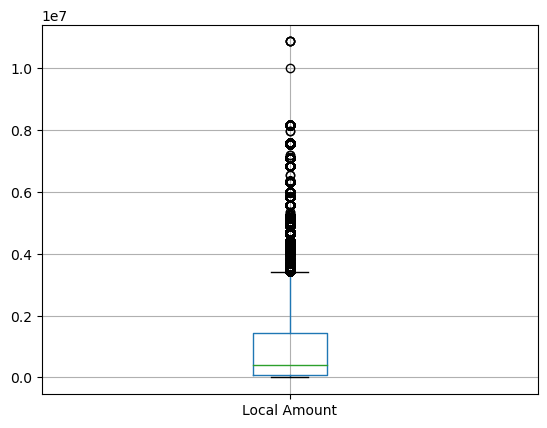

In [19]:
#Local Amount
print(df["Local Amount"].describe())
print("The skew values is:",df["Local Amount"].skew())
df.boxplot(column=["Local Amount"])
plt.show()

### USD Amount

USD Amount indicates Invoice Value converted to USD

count    9.393700e+04
mean     5.312013e+05
std      9.508693e+05
min      0.000000e+00
25%      3.766298e+04
50%      1.810010e+05
75%      5.996137e+05
max      1.084983e+07
Name: USD Amount, dtype: float64
The skew values is: 3.9389655525152905


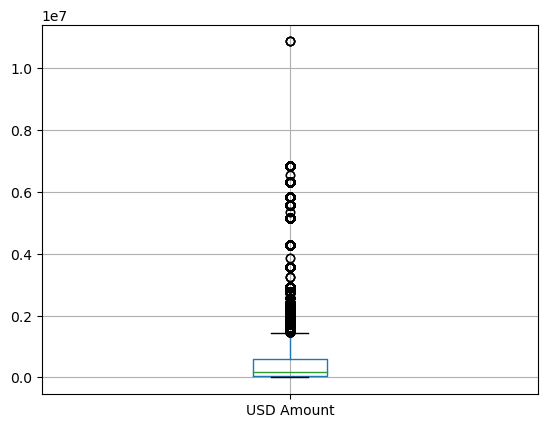

In [20]:
#USD Amount
print(df["USD Amount"].describe())
print("The skew values is:",df["USD Amount"].skew())
df.boxplot(column=["USD Amount"])
plt.show()

Text(0.5, 1.0, 'USD Amount')

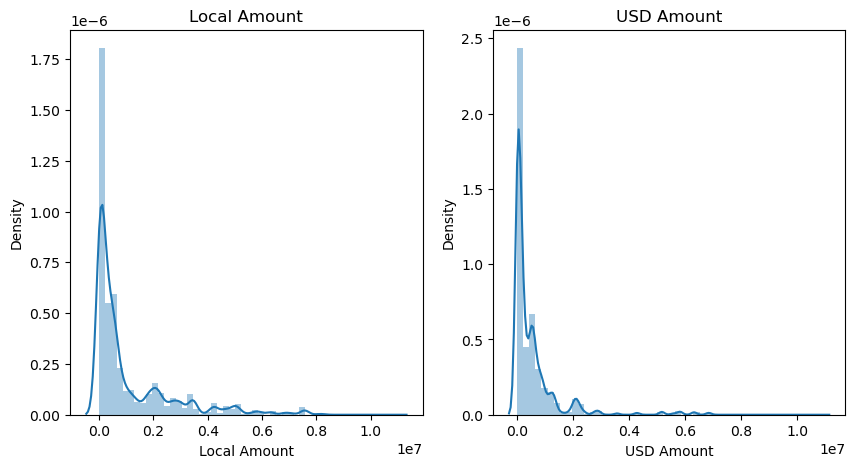

In [21]:
# Distplot of local amount and USD amount
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df["Local Amount"])
plt.title("Local Amount")

plt.subplot(1,2,2)
sns.distplot(df["USD Amount"])
plt.title("USD Amount")

In [22]:
#Checking local amount and USD amount are equal
df[df["Local Amount"]==df["USD Amount"]]

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,default
48,WIRE,ALLI Corp,7530,2021-01-13,PMT,AED,6448.74,6448.74,1.002E+11,2020-12-23,2021-01-30,30 Days from EOM,INV,AED,Non Goods,0
49,WIRE,ALLI Corp,7530,2021-01-13,PMT,AED,6448.74,6448.74,1.002E+11,2020-12-23,2021-01-30,30 Days from EOM,INV,AED,Non Goods,0
50,WIRE,ALLI Corp,7530,2021-01-13,PMT,AED,6448.74,6448.74,1.002E+11,2020-12-23,2021-01-30,30 Days from EOM,INV,AED,Non Goods,0
51,WIRE,ALLI Corp,7530,2021-01-13,PMT,AED,6448.74,6448.74,1.002E+11,2020-12-23,2021-01-30,30 Days from EOM,INV,AED,Non Goods,0
52,WIRE,MAC Corp,1385,2021-01-19,PMT,AED,49005.48,49005.48,1.0019E+11,2019-09-26,2019-10-26,30 Days from Inv Date,INV,USD,Non Goods,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93932,WIRE,PEAR Corp,21144,2021-04-01,PMT,USD,59914.50,59914.50,2.842E+11,2020-12-28,2020-12-28,Immediate,CM,USD,Goods,1
93933,WIRE,PEAR Corp,21144,2021-04-01,PMT,USD,59914.50,59914.50,2.842E+11,2020-12-28,2020-12-28,Immediate,CM,USD,Goods,1
93934,WIRE,PEAR Corp,21144,2021-04-01,PMT,USD,59914.50,59914.50,2.842E+11,2020-12-28,2020-12-28,Immediate,CM,USD,Goods,1
93935,WIRE,NAMS Corp,21145,2021-04-01,PMT,AED,23574.33,23574.33,2.842E+11,2021-01-24,2021-03-24,60 Days from Inv Date,INV,AED,Goods,1


In [23]:
#Checking the counts of currrency code
df["CURRENCY_CODE"].value_counts()

SAR    36495
AED    36279
USD    19524
EUR     1438
GBP      130
BHD       59
KWD       10
QAR        2
Name: CURRENCY_CODE, dtype: int64

In [24]:
#currency codes with USD
df[df["Local Amount"]==df["USD Amount"]]   [df["CURRENCY_CODE"]=="USD"]["CURRENCY_CODE"].value_counts()

USD    18855
Name: CURRENCY_CODE, dtype: int64

In [25]:
#currency codes other than USD
df[df["Local Amount"]==df["USD Amount"]]   [df["CURRENCY_CODE"]!="USD"]["CURRENCY_CODE"].value_counts()

AED    20534
EUR     1365
SAR      727
GBP      130
KWD       10
QAR        2
BHD        1
Name: CURRENCY_CODE, dtype: int64

• Not only USD, there are other currency codes in which AED has maximum values. so "Local Amount" could be dropped

## Categorical columns

#### 1.RECEIPT_METHOD

RECEIPT_METHOD indicates In which method payments have been made

In [26]:
##RECEIPT_METHOD
print("The statistical values are:\n",df.RECEIPT_METHOD.describe())
print("-----------------------------------------------")
print("The Percentage of different categories are :\n",round(df.RECEIPT_METHOD.value_counts(normalize=True),2)*100)

The statistical values are:
 count     93937
unique        8
top        WIRE
freq      84407
Name: RECEIPT_METHOD, dtype: object
-----------------------------------------------
The Percentage of different categories are :
 WIRE             90.0
AP/AR Netting     5.0
CHEQUE            4.0
CASH              1.0
I/C WIRE          0.0
PDC               0.0
I/C Check         0.0
I/C CASH          0.0
Name: RECEIPT_METHOD, dtype: float64


Text(0.5, 1.0, 'payment method used by vendors')

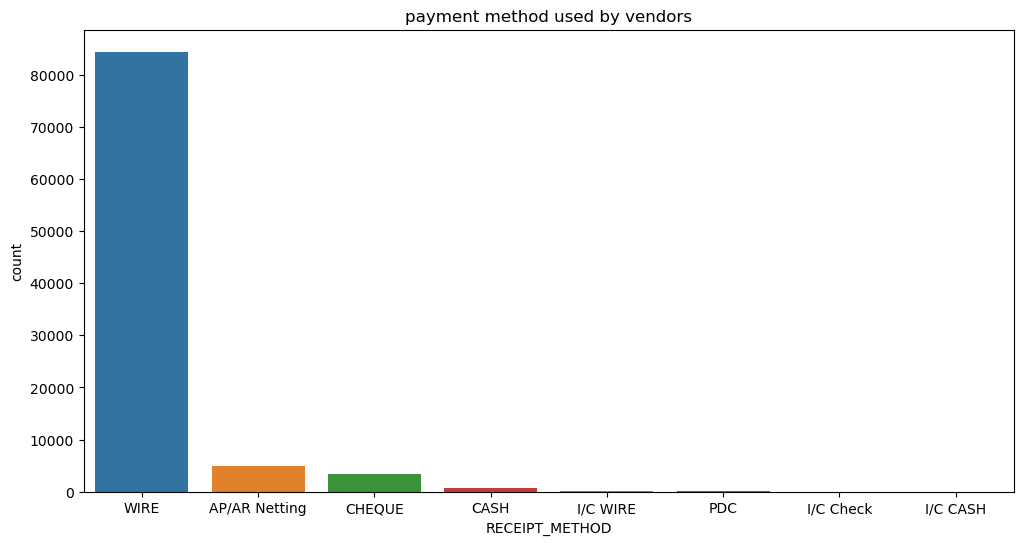

In [27]:
##visualising RECEIPT_METHOD
plt.figure(figsize=(12,6))
sns.countplot(data=df,x="RECEIPT_METHOD",order=df["RECEIPT_METHOD"].value_counts().index)
plt.title("payment method used by vendors")

90% of vendors use "WIRE" as payment method

#### 2. CUSTOMER_NAME

CUSTOMER_NAME indicates name of the customer/vendor

In [28]:
##CUSTOMER_NAME
print("The statistical values are:\n",df.CUSTOMER_NAME.describe())
print("-----------------------------------------------")
print("The Percentage of different categories are :\n",round(df.CUSTOMER_NAME.value_counts(normalize=True),2)*100)

The statistical values are:
 count         93937
unique          690
top       SEPH Corp
freq          23143
Name: CUSTOMER_NAME, dtype: object
-----------------------------------------------
The Percentage of different categories are :
 SEPH Corp    25.0
FARO Corp    16.0
PARF Corp     7.0
ALLI Corp     6.0
AREE Corp     2.0
             ... 
KHAW Corp     0.0
EYEW Corp     0.0
BRAV Corp     0.0
NOUS Corp     0.0
ESSE Corp     0.0
Name: CUSTOMER_NAME, Length: 690, dtype: float64


The top customer/vendor is SEPH Corp

#### 3.CLASS

CLASS indicates the payment against these invoices have already been received so Transaction Class as PMT (short for Payment) assigned

In [29]:
##CLASS
print("The statistical values are:\n",df.CLASS.describe())
print("-----------------------------------------------")
print("The Percentage of different categories are :\n",round(df.CLASS.value_counts(normalize=True),2)*100)

The statistical values are:
 count     93937
unique        1
top         PMT
freq      93937
Name: CLASS, dtype: object
-----------------------------------------------
The Percentage of different categories are :
 PMT    100.0
Name: CLASS, dtype: float64


CLASS has only one value "PMT" and this feature could be ignored while modeling

#### 4.CURRENCY_CODE

CURRENCY_CODE indicates Currency used for the payment

In [30]:
##CURRENCY_CODE
print("The statistical values are:\n",df.CURRENCY_CODE.describe())
print("-----------------------------------------------")
print("The Percentage of different categories are :\n",round(df.CURRENCY_CODE.value_counts(normalize=True),2)*100)

The statistical values are:
 count     93937
unique        8
top         SAR
freq      36495
Name: CURRENCY_CODE, dtype: object
-----------------------------------------------
The Percentage of different categories are :
 SAR    39.0
AED    39.0
USD    21.0
EUR     2.0
GBP     0.0
BHD     0.0
KWD     0.0
QAR     0.0
Name: CURRENCY_CODE, dtype: float64


Text(0.5, 1.0, 'CURRENCY_CODE')

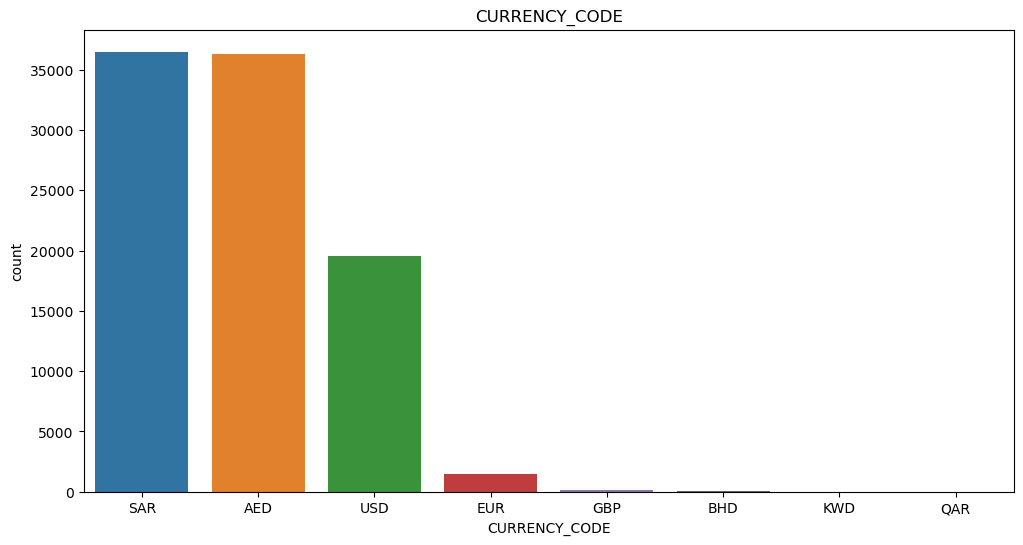

In [31]:
##Visualising CURRENCY_CODE
plt.figure(figsize=(12,6))
sns.countplot(data=df,x="CURRENCY_CODE",order=df["CURRENCY_CODE"].value_counts().index)
plt.title("CURRENCY_CODE")

Most of the vendors uses "SAR" as currency code

#### 5. PAYMENT_TERM

PAYMENT_TERM indicates the days given to the vendor/customer for making the payments

In [32]:
##PAYMENT_TERM
print("The statistical values are:\n",df.PAYMENT_TERM.describe())
print("-----------------------------------------------")
print("The Percentage of different categories are :\n",round(df.PAYMENT_TERM.value_counts(normalize=True),2)*100)

The statistical values are:
 count                     93937
unique                       42
top       60 Days from Inv Date
freq                      19870
Name: PAYMENT_TERM, dtype: object
-----------------------------------------------
The Percentage of different categories are :
 60 Days from Inv Date                                      21.0
30 Days from Inv Date                                      16.0
60 Days from EOM                                           13.0
30 Days from EOM                                           12.0
15 Days from EOM                                            8.0
Immediate Payment                                           6.0
Immediate                                                   6.0
90 Days from EOM                                            4.0
45 Days from Inv Date                                       4.0
45 Days from EOM                                            4.0
90 Days from Inv Date                                       2.0
100% Adv Pa

#### 6. INVOICE_CLASS

INVOICE_CLASS indicates the three types of Invoice classes - Credit Memo or Credit Note (CM), 
                                                             Debit Memo or Debit Note (DM) 
                                                            or Invoice (INV)

In [33]:
##INVOICE_CLASS
print("The statistical values are:\n",df.INVOICE_CLASS.describe())
print("-----------------------------------------------")
print("The Percentage of different categories are :\n",round(df.INVOICE_CLASS.value_counts(normalize=True),2)*100)

The statistical values are:
 count     93937
unique        3
top         INV
freq      88124
Name: INVOICE_CLASS, dtype: object
-----------------------------------------------
The Percentage of different categories are :
 INV    94.0
CM      6.0
DM      1.0
Name: INVOICE_CLASS, dtype: float64


Text(0.5, 1.0, 'INVOICE_CLASS')

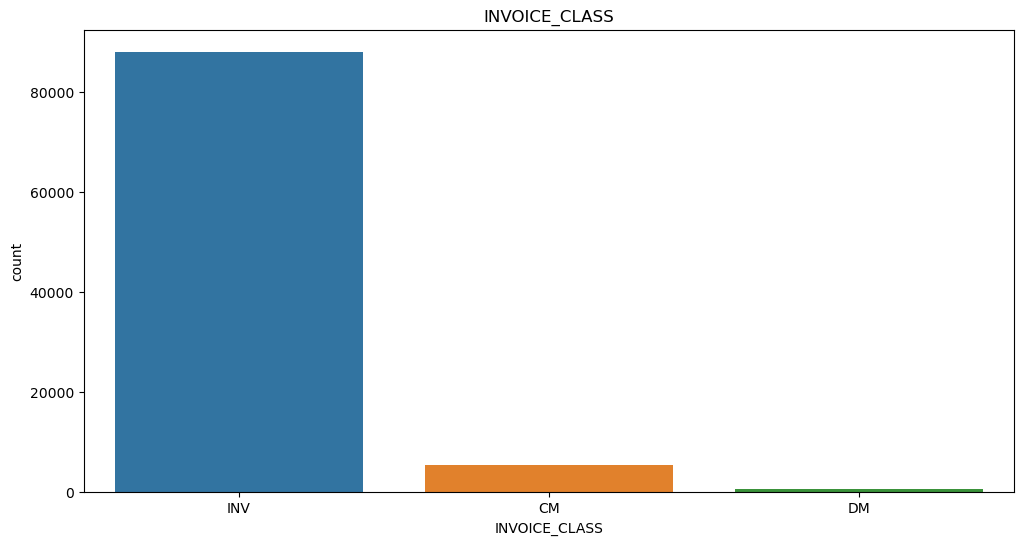

In [34]:
##Visualising INVOICE_CLASS
plt.figure(figsize=(12,6))
sns.countplot(data=df,x="INVOICE_CLASS",order=df["INVOICE_CLASS"].value_counts().index)
plt.title("INVOICE_CLASS")

INV has the highest number of bills in INVOICE_CLASS column

#### 7. INVOICE_CURRENCY_CODE

INVOICE_CURRENCY_CODE indicates the currency code as per the invoice generated.

In [35]:
##INVOICE_CURRENCY_CODE
print("The statistical values are:\n",df.INVOICE_CURRENCY_CODE.describe())
print("-----------------------------------------------")
print("The Percentage of different categories are :\n",round(df.INVOICE_CURRENCY_CODE.value_counts(normalize=True),2)*100)

The statistical values are:
 count     93937
unique       10
top         SAR
freq      39199
Name: INVOICE_CURRENCY_CODE, dtype: object
-----------------------------------------------
The Percentage of different categories are :
 SAR    42.0
AED    34.0
USD    20.0
EUR     2.0
KWD     1.0
QAR     1.0
BHD     0.0
GBP     0.0
JOD     0.0
ZAR     0.0
Name: INVOICE_CURRENCY_CODE, dtype: float64


Text(0.5, 1.0, 'INVOICE_CURRENCY_CODE')

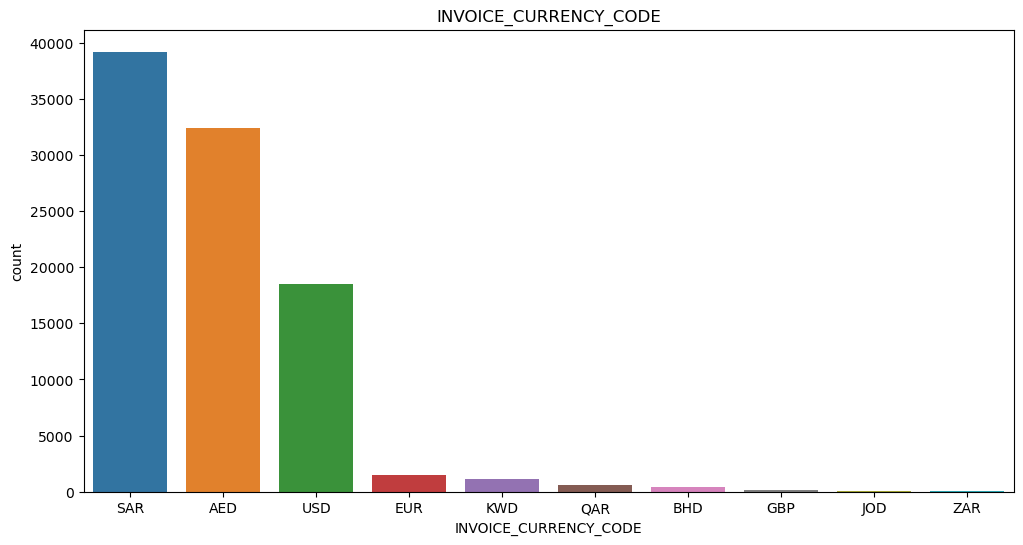

In [36]:
##Visualising INVOICE_CURRENCY_CODE
plt.figure(figsize=(12,6))
sns.countplot(data=df,x="INVOICE_CURRENCY_CODE",order=df["INVOICE_CURRENCY_CODE"].value_counts().index)
plt.title("INVOICE_CURRENCY_CODE")

#### 8. INVOICE_TYPE

INVOICE_TYPE indicates the invoice created for physical goods or services (non-goods)

In [37]:
##INVOICE_TYPE
print("The statistical values are:\n",df.INVOICE_TYPE.describe())
print("-----------------------------------------------")
print("The Percentage of different categories are :\n",round(df.INVOICE_TYPE.value_counts(normalize=True),2)*100)

The statistical values are:
 count     93937
unique        2
top       Goods
freq      66715
Name: INVOICE_TYPE, dtype: object
-----------------------------------------------
The Percentage of different categories are :
 Goods        71.0
Non Goods    29.0
Name: INVOICE_TYPE, dtype: float64


Text(0.5, 1.0, 'INVOICE_TYPE')

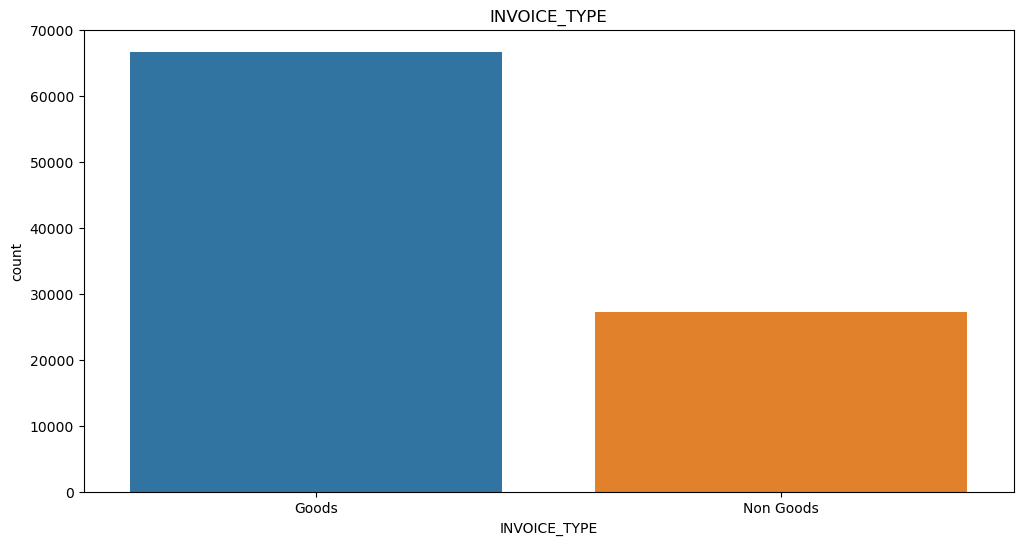

In [38]:
##Visualising INVOICE_TYPE
plt.figure(figsize=(12,6))
sns.countplot(data=df,x="INVOICE_TYPE",order=df["INVOICE_TYPE"].value_counts().index)
plt.title("INVOICE_TYPE")

Physical goods are more than the service goods

In [39]:
#info() of df dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         93937 non-null  object        
 1   CUSTOMER_NAME          93937 non-null  object        
 2   CUSTOMER_NUMBER        93937 non-null  int64         
 3   RECEIPT_DATE           93937 non-null  datetime64[ns]
 4   CLASS                  93937 non-null  object        
 5   CURRENCY_CODE          93937 non-null  object        
 6   Local Amount           93937 non-null  float64       
 7   USD Amount             93937 non-null  float64       
 8   INVOICE_ALLOCATED      93937 non-null  object        
 9   INVOICE_CREATION_DATE  93937 non-null  datetime64[ns]
 10  DUE_DATE               93937 non-null  datetime64[ns]
 11  PAYMENT_TERM           93937 non-null  object        
 12  INVOICE_CLASS          93937 non-null  object        
 13  I

### Checking the data imbalance percentage

In [40]:
#checkinf the percentage of default value counts
df.default.value_counts(normalize=True)

1    0.659783
0    0.340217
Name: default, dtype: float64

([<matplotlib.axis.XTick at 0x1fde5a5df90>,
 [Text(0, 0, 'on-time'), Text(1, 0, 'Late')])

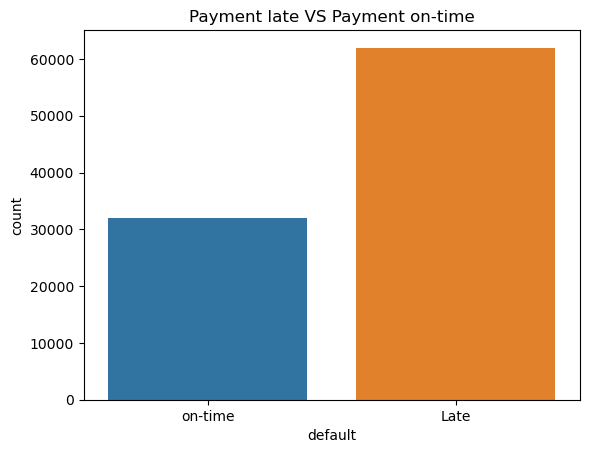

In [41]:
#visualising the target column
sns.countplot(data=df,x="default")
plt.title("Payment late VS Payment on-time")
plt.xticks((0,1),("on-time","Late"))


66% of customers paying late and 34% customers are paying on-time

## Bivariate Analysis

Here the target column is default who pays the due late i.e, Latepayment customers

In [42]:
#Extracting date from RECEIPT_DATE, INVOICE_CREATION_DATE, DUE_DATE
df["monthly_receipt"]=df["RECEIPT_DATE"].dt.month
df["monthly_invoice_creation"]=df["INVOICE_CREATION_DATE"].dt.month
df["monthly_due"]=df["DUE_DATE"].dt.month

#### 1. Latepayment customers Vs DUE_DATE

In [43]:
#Latepayers dues monthwise
dues_month=df.groupby("monthly_due").count()["DUE_DATE"]
late_dues_month=df.groupby("monthly_due").mean()["default"]
late_dues_month

monthly_due
1     0.718190
2     0.687553
3     0.622867
4     0.621895
5     0.559859
6     0.417135
7     0.389342
8     0.800718
9     0.976578
10    0.999428
11    1.000000
12    0.999845
Name: default, dtype: float64

Text(0, 0.5, 'Latepayment rate')

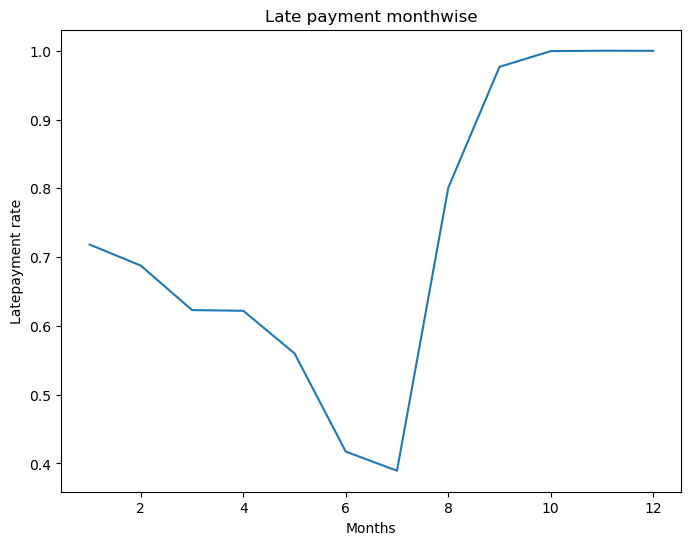

In [44]:
#visualisation
plt.figure(figsize=(8,6))

plt.plot(late_dues_month)
plt.title("Late payment monthwise")
plt.xlabel("Months")
plt.ylabel("Latepayment rate")


• In the month 7, the late payment rate is low and it get increased gradually till month 12

#### 2. Latepayment customers Vs INVOICE_CREATION_DATE

In [45]:
#Latepayers invoice generated monthwise
invoice_month_count=df.groupby("monthly_invoice_creation").count()["DUE_DATE"]
late_invoice_month=df.groupby("monthly_invoice_creation").mean()["default"]
late_invoice_month

monthly_invoice_creation
1     0.652984
2     0.634223
3     0.589752
4     0.526664
5     0.497473
6     0.684621
7     0.989535
8     1.000000
9     1.000000
10    0.927223
11    0.825499
12    0.677842
Name: default, dtype: float64

Text(0, 0.5, 'Latepayment rate')

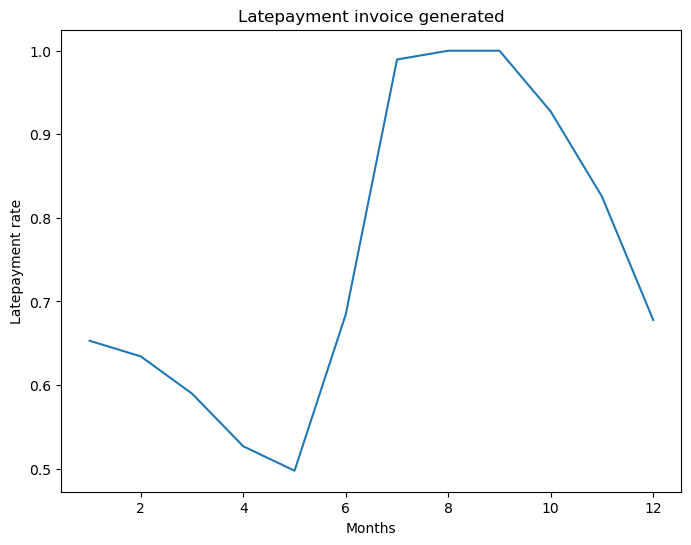

In [46]:
#visualisation
plt.figure(figsize=(8,6))

plt.plot(late_invoice_month)
plt.title("Latepayment invoice generated")
plt.xlabel("Months")
plt.ylabel("Latepayment rate")

• In month 5, the Latepayment invoice generated is less and it is peak in the month 8

#### 3. Latepayment customers Vs RECEIPT_DATE

In [47]:
#Latepayers receipt generated monthwise
receipt_month_count=df.groupby("monthly_receipt").count()["DUE_DATE"]
late_receipt_month=df.groupby("monthly_due").mean()["default"]
late_receipt_month

monthly_due
1     0.718190
2     0.687553
3     0.622867
4     0.621895
5     0.559859
6     0.417135
7     0.389342
8     0.800718
9     0.976578
10    0.999428
11    1.000000
12    0.999845
Name: default, dtype: float64

Text(0, 0.5, 'Latepayment rate')

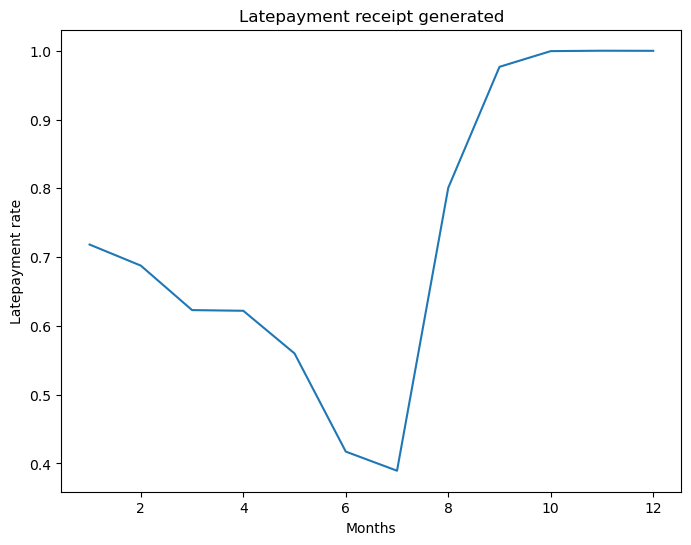

In [48]:
#visualisation
plt.figure(figsize=(8,6))

plt.plot(late_receipt_month)
plt.title("Latepayment receipt generated")
plt.xlabel("Months")
plt.ylabel("Latepayment rate")

• In the month 7, the receipt generated is less and gradually increases from month 7 to month 12

#### 4. Latepayment customers Vs USD Amount

In [49]:
#Latepayers USD Amount
late_usd_amount=df.pivot_table(values="USD Amount",index="default",aggfunc=["mean","median",np.std])
late_usd_amount

,mean,median,std
,USD Amount,USD Amount,USD Amount
default,,,
0,573789.580869,222908.31,878567.107996
1,509240.683742,153246.45,985370.354404


Text(0, 0.5, 'USD Amount')

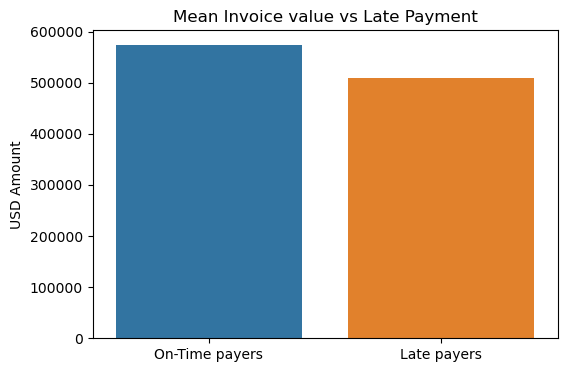

In [50]:
#Visualisation of mean invoice value Vs latePayment
plt.figure(figsize=(6,4))
sns.barplot(data=late_usd_amount, x=df['default'].value_counts(), y=('mean','USD Amount'))
plt.xticks((0,1), ('On-Time payers', 'Late payers'))
plt.title("Mean Invoice value vs Late Payment")
plt.xlabel("")
plt.ylabel("USD Amount")


Text(0, 0.5, 'USD Amount')

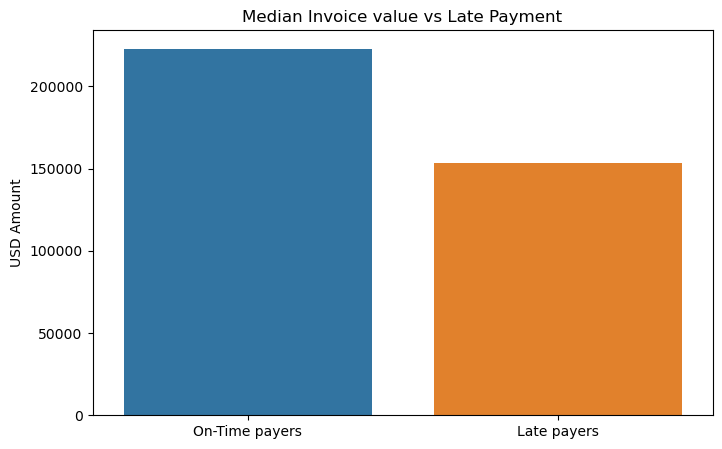

In [51]:
#Visualisation of median Vs latePayment
plt.figure(figsize=(8,5))
sns.barplot(data=late_usd_amount, x=df['default'].value_counts(), y=('median','USD Amount'))
plt.xticks((0,1), ('On-Time payers', 'Late payers'))
plt.title("Median Invoice value vs Late Payment")
plt.xlabel("")
plt.ylabel("USD Amount")


• The mean and median values of On-time payers are higher than the late payers

#### 5. CUSTOMER_NAME Vs default

In [52]:
#Finding the top 20 latepayment customers with total orders
customer_total_orders=df.groupby("CUSTOMER_NAME").count()["default"].sort_values(ascending=False)
customer_total_orders.head(20)

CUSTOMER_NAME
SEPH Corp    23143
FARO Corp    15004
PARF Corp     6624
ALLI Corp     5645
AREE Corp     2224
DEBE Corp     2133
RADW Corp     1647
YOUG Corp     1480
HABC Corp     1402
CARR Corp      952
AL T Corp      870
VAVA Corp      837
CGR  Corp      834
REAL Corp      802
PARI Corp      759
ARAB Corp      647
LIFE Corp      627
AL S Corp      617
MCT  Corp      585
CWF  Corp      538
Name: default, dtype: int64

#### 6. INVOICE_CLASS Vs default

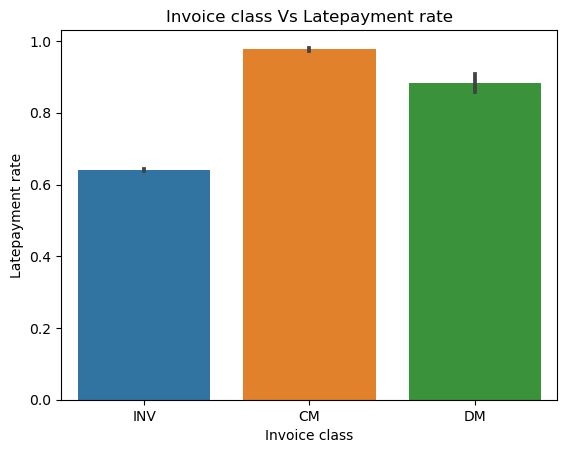

In [53]:
#Visualisation of Invoice class Vs Latepayment rate
sns.barplot(data=df, x='INVOICE_CLASS', y=df['default'], estimator=np.mean)
plt.title("Invoice class Vs Latepayment rate")
plt.xlabel("Invoice class")
plt.ylabel("Latepayment rate")
plt.show(block=False)

The late payment rate is high through CM (credit memo) class

#### 7. Invoice type Vs default

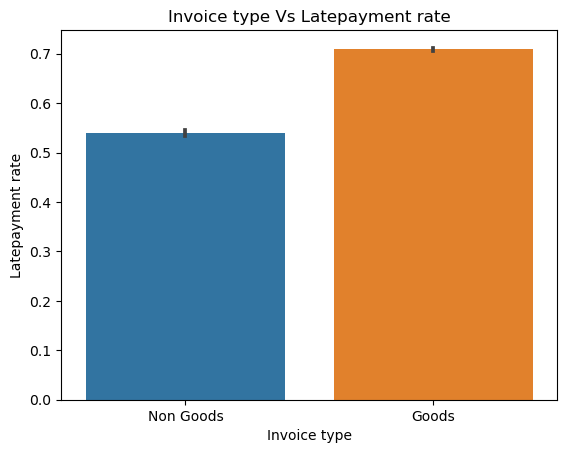

In [54]:
#Visualisation of Invoice type Vs Latepayment rate
sns.barplot(data=df, x='INVOICE_TYPE', y=df['default'], estimator=np.mean)
plt.title("Invoice type Vs Latepayment rate")
plt.xlabel("Invoice type")
plt.ylabel("Latepayment rate")
plt.show(block=False)

Late payment rate is higher in "Goods"

#### Removing unnecessary columns

- Drop CLASS since it has one method for all rows
- Drop CURRENCY_CODE since INVOICE_CURRENCY_CODE is available
- Drop Local Amount because USD Amount column is present
- RECEIPT_METHOD, CUSTOMER_NUMBER, INVOICE_ALLOCATED are not signigicant while modeling. so, these columns could be dropped.

In [55]:
##Removing unnecessary columns
df=df.drop(['RECEIPT_METHOD', 'CUSTOMER_NUMBER','CLASS','CURRENCY_CODE','Local Amount','INVOICE_ALLOCATED'],axis=1)

## 4: Feature Engineering

#### PAYMENT_TERM

In [56]:
# Using cumsum() function to get cummulative sum on value_counts()
pay_term_cumsum = df['PAYMENT_TERM'].value_counts(normalize=True).cumsum()
pay_term_cumsum

60 Days from Inv Date                                      0.211525
30 Days from Inv Date                                      0.367715
60 Days from EOM                                           0.500974
30 Days from EOM                                           0.621331
15 Days from EOM                                           0.701640
Immediate Payment                                          0.759914
Immediate                                                  0.815919
90 Days from EOM                                           0.857362
45 Days from Inv Date                                      0.895153
45 Days from EOM                                           0.932508
90 Days from Inv Date                                      0.956045
100% Adv Payment                                           0.969256
25 DAYS FROM EOM                                           0.974174
Cash on Delivery                                           0.978624
15 Days from Inv Date                           

In [57]:
# Both Immediate and Immediate payment are same, hence replacing with Immediate Payment

df['PAYMENT_TERM'] = df['PAYMENT_TERM'].replace('Immediate', 'Immediate Payment')

# 45 Days from EOM and 45 DAYS + EOM are giving same information, hence using 45 Days from EOM
df['PAYMENT_TERM'] = df['PAYMENT_TERM'].replace('45 DAYS + EOM', '45 Days from EOM')
pay_term_cumsum = df['PAYMENT_TERM'].value_counts(normalize=True).cumsum()
pay_term_cumsum

60 Days from Inv Date                                      0.211525
30 Days from Inv Date                                      0.367715
60 Days from EOM                                           0.500974
30 Days from EOM                                           0.621331
Immediate Payment                                          0.735610
15 Days from EOM                                           0.815919
90 Days from EOM                                           0.857362
45 Days from EOM                                           0.898145
45 Days from Inv Date                                      0.935936
90 Days from Inv Date                                      0.959473
100% Adv Payment                                           0.972684
25 DAYS FROM EOM                                           0.977602
Cash on Delivery                                           0.982052
15 Days from Inv Date                                      0.985842
On Consignment                                  

In [58]:
# Top 10 values to keep
vals_to_keep= pay_term_cumsum.index[:10]
# Clubbing the rest values to others
df['PAYMENT_TERM'] = df['PAYMENT_TERM'].apply(lambda x : x if x in vals_to_keep else 'others')
# Sanity Check
df['PAYMENT_TERM'].value_counts() 

60 Days from Inv Date    19870
30 Days from Inv Date    14672
60 Days from EOM         12518
30 Days from EOM         11306
Immediate Payment        10735
15 Days from EOM          7544
90 Days from EOM          3893
45 Days from EOM          3831
others                    3807
45 Days from Inv Date     3550
90 Days from Inv Date     2211
Name: PAYMENT_TERM, dtype: int64

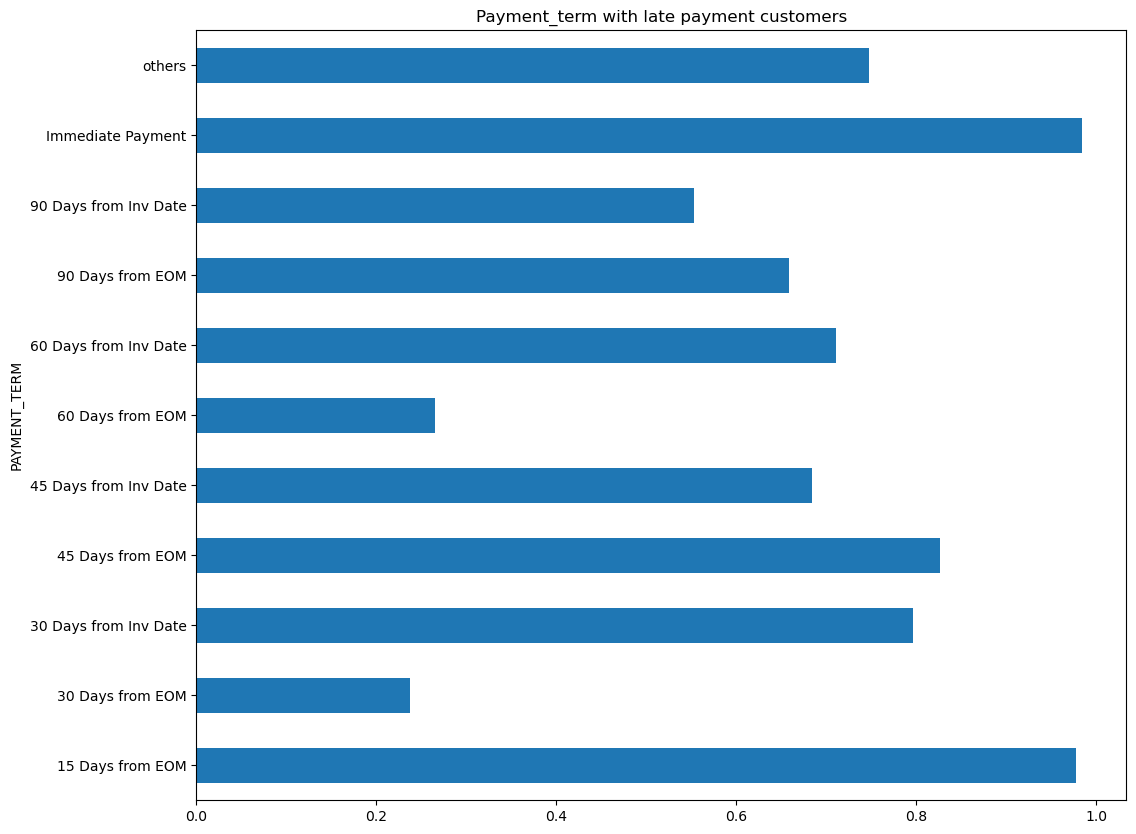

In [59]:
#visualisation
plt.figure(figsize=(12,10))
df.groupby(["PAYMENT_TERM"])["default"].mean().plot.barh()
plt.title("Payment_term with late payment customers")
plt.show(block=False)

### Creation of dummy variables

In [60]:
#checking the size
df.shape

(93937, 13)

In [61]:
#creation of dummy variables for PAYMENT_TERM
dummy=pd.get_dummies(df["PAYMENT_TERM"])
#merging with original frame
df=df.join(dummy).drop("PAYMENT_TERM",axis=1)
df.head()

,CUSTOMER_NAME,RECEIPT_DATE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,default,monthly_receipt,...,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,others
0,C EA Corp,2021-04-20,101018.63040,2020-11-02,2020-12-30,INV,AED,Non Goods,1,4,...,1,0,0,0,0,0,0,0,0,0
1,RADW Corp,2021-01-31,48990.21133,2020-12-29,2021-01-28,INV,SAR,Non Goods,1,1,...,0,1,0,0,0,0,0,0,0,0
2,RADW Corp,2021-01-31,41991.60971,2021-01-30,2021-03-01,INV,SAR,Non Goods,0,1,...,0,1,0,0,0,0,0,0,0,0
3,FARO Corp,2021-01-31,41991.60971,2020-12-15,2021-01-14,INV,SAR,Non Goods,1,1,...,0,1,0,0,0,0,0,0,0,0
4,RADW Corp,2021-01-31,41991.60971,2020-12-15,2021-01-14,INV,SAR,Non Goods,1,1,...,0,1,0,0,0,0,0,0,0,0


In [62]:
#dummy variable for INVOICE_CLASS
dummy_inv= pd.get_dummies(df['INVOICE_CLASS'])
df = df.join(dummy_inv).drop('INVOICE_CLASS', axis=1 )
df.columns

Index(['CUSTOMER_NAME', 'RECEIPT_DATE', 'USD Amount', 'INVOICE_CREATION_DATE',
       'DUE_DATE', 'INVOICE_CURRENCY_CODE', 'INVOICE_TYPE', 'default',
       'monthly_receipt', 'monthly_invoice_creation', 'monthly_due',
       '15 Days from EOM', '30 Days from EOM', '30 Days from Inv Date',
       '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
       '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date',
       'Immediate Payment', 'others', 'CM', 'DM', 'INV'],
      dtype='object')

In [63]:
#Checkng the shape of the dataframe
df.shape

(93937, 25)

## 5. Reading, understanding and cleaning of open voice data

In [64]:
#loading the dataset
open_df=pd.read_csv("Open_Invoice_data.csv",encoding="latin1")
open_df.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [65]:
#checking the shape of the data
open_df.shape

(88204, 14)

In [66]:
#checking the columns
open_df.columns

Index(['AS_OF_DATE', 'Customer Type', 'Customer_Name', 'Customer Account No',
       'Transaction Number', 'Transaction Date', 'Payment Term', 'Due Date',
       'Transaction Currency', 'Local Amount', 'Transaction Class', 'AGE',
       'USD Amount', 'INV_CREATION_DATE'],
      dtype='object')

In [67]:
#checking the summary of numerical columns
open_df.describe()

,Customer Account No,AGE
count,88201.000000,88204.000000
mean,21911.718291,183.430706
std,17427.778620,368.123334
min,1044.000000,-359.000000
25%,3925.000000,-17.000000
50%,20998.000000,47.000000
75%,35066.000000,242.000000
max,55049.000000,7343.000000


In [68]:
#checking the unique values in each column
open_df.nunique()

AS_OF_DATE                  1
Customer Type               3
Customer_Name             833
Customer Account No      1399
Transaction Number      84761
Transaction Date         1885
Payment Term               42
Due Date                 1958
Transaction Currency       16
Local Amount            23683
Transaction Class           4
AGE                      1958
USD Amount              18185
INV_CREATION_DATE       29033
dtype: int64

In [69]:
#checking the information of the dataframe
open_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AS_OF_DATE            88204 non-null  object 
 1   Customer Type         88204 non-null  object 
 2   Customer_Name         88204 non-null  object 
 3   Customer Account No   88201 non-null  float64
 4   Transaction Number    88195 non-null  object 
 5   Transaction Date      88204 non-null  object 
 6   Payment Term          88204 non-null  object 
 7   Due Date              88204 non-null  object 
 8   Transaction Currency  88204 non-null  object 
 9   Local Amount          88204 non-null  object 
 10  Transaction Class     88204 non-null  object 
 11  AGE                   88204 non-null  int64  
 12  USD Amount            88204 non-null  object 
 13  INV_CREATION_DATE     88204 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 9.4+ MB


#### Removing unnecessary columns

In [70]:
#Removing unnecessary columns
open_df=open_df.drop(["Transaction Number","AS_OF_DATE","Customer Type","Customer Account No","Transaction Date","Transaction Currency","Local Amount"],axis=1)
open_df.shape

(88204, 7)

In [71]:
#check the first five values in the dataset
open_df.head()

,Customer_Name,Payment Term,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,GIVE Corp,Immediate,21/12/2021,CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,AL J Corp,30 Days from Inv Date,03/03/2022,INVOICE,33,"2,000",2/1/2022 14:09
2,AL J Corp,30 Days from Inv Date,23/04/2022,INVOICE,-18,"2,000",3/24/2022 17:46
3,AL R Corp,15 Days from Inv Date,19/01/2022,INVOICE,76,"2,415",1/5/2022 11:49
4,ALLI Corp,30 Days from EOM,30/04/2022,INVOICE,-25,"3,800",3/3/2022 22:30


Here, changes to be made in "USD Amount"

In [72]:
#converting USD Amount to integer
open_df["USD Amount"]=open_df["USD Amount"].str.replace(",","").astype(int)

Also, there are negative values in "USD Amount"

In [73]:
#removing negative values in "USD Amount"
open_df=open_df[open_df["USD Amount"]>0]
open_df.head()

,Customer_Name,Payment Term,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
1,AL J Corp,30 Days from Inv Date,03/03/2022,INVOICE,33,2000,2/1/2022 14:09
2,AL J Corp,30 Days from Inv Date,23/04/2022,INVOICE,-18,2000,3/24/2022 17:46
3,AL R Corp,15 Days from Inv Date,19/01/2022,INVOICE,76,2415,1/5/2022 11:49
4,ALLI Corp,30 Days from EOM,30/04/2022,INVOICE,-25,3800,3/3/2022 22:30
5,ALLI Corp,30 Days from EOM,30/04/2022,INVOICE,-25,1264,3/3/2022 22:30


In [74]:
#changing the format of Due Date and INV_CREATION_DATE into pandas datatime format
open_df[["Due Date","INV_CREATION_DATE"]]=open_df[["Due Date","INV_CREATION_DATE"]].apply(pd.to_datetime)

In [75]:
#sanity check
open_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79516 entries, 1 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_Name      79516 non-null  object        
 1   Payment Term       79516 non-null  object        
 2   Due Date           79516 non-null  datetime64[ns]
 3   Transaction Class  79516 non-null  object        
 4   AGE                79516 non-null  int64         
 5   USD Amount         79516 non-null  int32         
 6   INV_CREATION_DATE  79516 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(1), object(3)
memory usage: 4.5+ MB


In [76]:
# Checking the values of null percentage
round((open_df.isnull().sum()/len(open_df)*100),2).sort_values(ascending=False)

Customer_Name        0.0
Payment Term         0.0
Due Date             0.0
Transaction Class    0.0
AGE                  0.0
USD Amount           0.0
INV_CREATION_DATE    0.0
dtype: float64

No null values

In [77]:
# Keeping the same levels as done in recieved payment dataset
open_df['Payment Term'] = open_df['Payment Term'].apply(lambda x: x if x in vals_to_keep else 'others')

open_df['Payment Term'].value_counts()

30 Days from Inv Date    18328
60 Days from Inv Date    17599
Immediate Payment        16202
60 Days from EOM          8170
others                    5385
30 Days from EOM          5324
90 Days from EOM          2595
90 Days from Inv Date     2429
45 Days from Inv Date     1533
15 Days from EOM          1097
45 Days from EOM           854
Name: Payment Term, dtype: int64

In [78]:
# Creating dummy variables for the column
term_dummies_open = pd.get_dummies(open_df['Payment Term']).drop('others', axis=1)

# Merging the dummies dataframe into open_data and removing the 'Payment Term' column
open_df = open_df.join(term_dummies_open).drop('Payment Term', axis=1)
open_df.head()

,Customer_Name,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment
1,AL J Corp,2022-03-03,INVOICE,33,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0
2,AL J Corp,2022-04-23,INVOICE,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0
3,AL R Corp,2022-01-19,INVOICE,76,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0
4,ALLI Corp,2022-04-30,INVOICE,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0
5,ALLI Corp,2022-04-30,INVOICE,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0


### Transaction Class column

In [79]:
#Checking Transaction Class column
open_df["Transaction Class"].value_counts()

INVOICE       78251
DEBIT NOTE     1265
Name: Transaction Class, dtype: int64

In [80]:
#replacing INVOICE with INV and DEBIT NOTE with DM
open_df['Transaction Class'] = open_df['Transaction Class'].map(lambda x: 'INV' if x=='INVOICE' else 'DM')

In [81]:
# Creating dummy variables for the column
tc = pd.get_dummies(open_df['Transaction Class'])

# Adding the dummy variables to main dataset and dropping the Transaction Class column
open_df = open_df.join(tc).drop('Transaction Class', axis=1)

# Adding 'CM' level to the open_data dataset same as received payment data
open_df['CM'] = 0

In [82]:
#checking the first five values
open_df.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM
1,AL J Corp,2022-03-03,33,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0,0,1,0
2,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0
3,AL R Corp,2022-01-19,76,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0,0,1,0
4,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0
5,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0


### Checking the columns of Received_Payments_Data and Open_Invoice_data

In [83]:
#columns
open_df.columns

Index(['Customer_Name', 'Due Date', 'AGE', 'USD Amount', 'INV_CREATION_DATE',
       '15 Days from EOM', '30 Days from EOM', '30 Days from Inv Date',
       '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
       '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date',
       'Immediate Payment', 'DM', 'INV', 'CM'],
      dtype='object')

In [84]:
#columns
df.columns

Index(['CUSTOMER_NAME', 'RECEIPT_DATE', 'USD Amount', 'INVOICE_CREATION_DATE',
       'DUE_DATE', 'INVOICE_CURRENCY_CODE', 'INVOICE_TYPE', 'default',
       'monthly_receipt', 'monthly_invoice_creation', 'monthly_due',
       '15 Days from EOM', '30 Days from EOM', '30 Days from Inv Date',
       '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
       '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date',
       'Immediate Payment', 'others', 'CM', 'DM', 'INV'],
      dtype='object')

## 6. Segmentation on customers

In [85]:
# calculating actual number of days to make payment
df["days_payable"]=(df["RECEIPT_DATE"]-df["INVOICE_CREATION_DATE"]).dt.days

In [86]:
#calculating with customer name
cust_segm_1=df.groupby("CUSTOMER_NAME")["days_payable"].mean()
cust_segm_1=cust_segm_1.to_frame()
cust_segm_1.rename(columns={"days_payable":"payment_mean"},inplace=True)
cust_segm_1

,payment_mean
CUSTOMER_NAME,
3D D Corp,24.395349
6TH Corp,40.666667
A3 D Corp,45.400000
ABC Corp,16.000000
ABDU Corp,76.906250
...,...
YOUS Corp,117.000000
ZAHR Corp,144.928571
ZAIN Corp,67.095238


In [87]:
#calculating standard deviation with customer name
cust_segm_2=df.groupby("CUSTOMER_NAME")["days_payable"].std()
cust_segm_2=cust_segm_2.to_frame()
cust_segm_2.rename(columns={"days_payable":"payment_std"},inplace=True)
cust_segm_2

,payment_std
CUSTOMER_NAME,
3D D Corp,13.040449
6TH Corp,7.952987
A3 D Corp,52.581366
ABC Corp,0.000000
ABDU Corp,54.919326
...,...
YOUS Corp,33.949160
ZAHR Corp,52.197059
ZAIN Corp,46.326945


In [88]:
#merging two frames
cust_segm=pd.merge(cust_segm_1,cust_segm_2,how="inner",on="CUSTOMER_NAME")
cust_segm.head()

,payment_mean,payment_std
CUSTOMER_NAME,,
3D D Corp,24.395349,13.040449
6TH Corp,40.666667,7.952987
A3 D Corp,45.400000,52.581366
ABC Corp,16.000000,0.000000
ABDU Corp,76.906250,54.919326


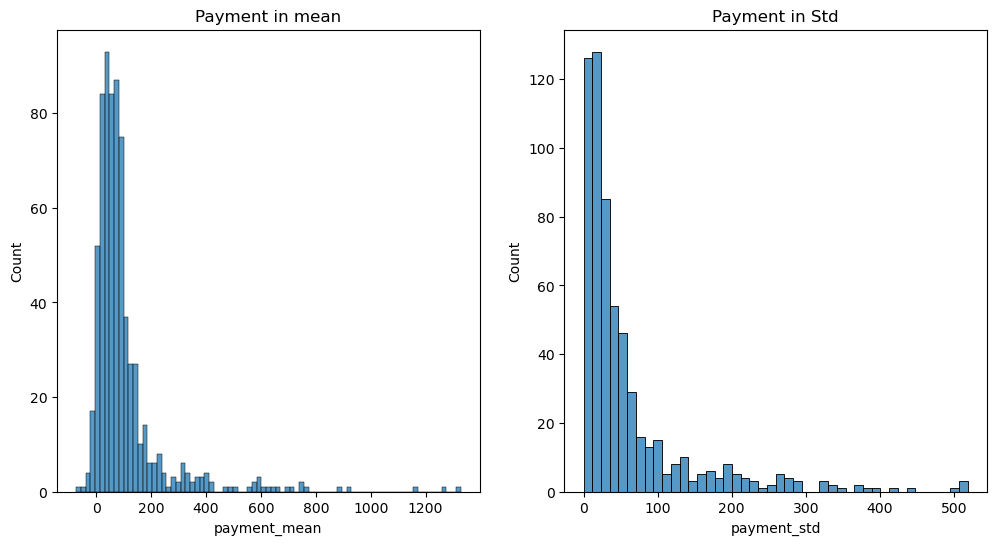

In [89]:
#plotting of cust_segm
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(cust_segm["payment_mean"])
plt.title("Payment in mean")
plt.subplot(1,2,2)
sns.histplot(cust_segm["payment_std"])
plt.title("Payment in Std")
plt.show(block=False)

Here , the data is normalized and scaling to be done.

### Scaling

In [90]:
#importing libraries
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [91]:
#scaling
cust_segm[["payment_mean","payment_std"]]=scaler.fit_transform(cust_segm[["payment_mean","payment_std"]])

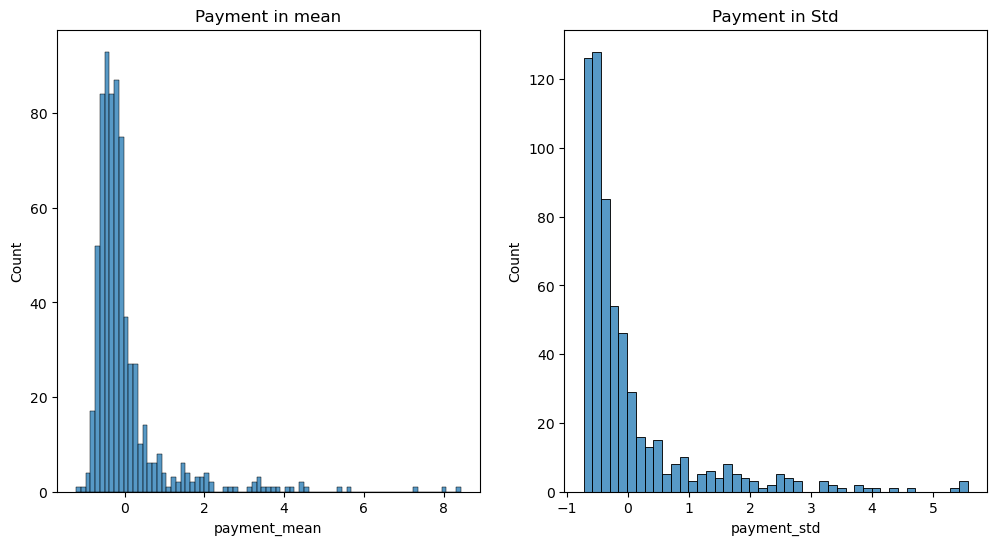

In [92]:
#plotting of cust_segm
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(cust_segm["payment_mean"])
plt.title("Payment in mean")
plt.subplot(1,2,2)
sns.histplot(cust_segm["payment_std"])
plt.title("Payment in Std")
plt.show(block=False)

In [93]:
#resetting the index
cust_segm.reset_index(inplace=True)

In [94]:
#Checking the values of null percentage
round(cust_segm.isnull().sum()/len(cust_segm)*100,2).sort_values(ascending=False)

payment_std      12.46
CUSTOMER_NAME     0.00
payment_mean      0.00
dtype: float64

In [95]:
#imputation with the value 0 for payment_std
cust_segm["payment_std"].fillna(0,inplace=True)

In [96]:
#copying this dataframe for clustering
cluster_df=cust_segm.copy()
cluster_df.head()

,CUSTOMER_NAME,payment_mean,payment_std
0,3D D Corp,-0.539379,-0.569399
1,6TH Corp,-0.427407,-0.631189
2,A3 D Corp,-0.394835,-0.089152
3,ABC Corp,-0.597152,-0.727783
4,ABDU Corp,-0.178023,-0.060756


In [97]:
#dropping customer_name
cluster_df.drop("CUSTOMER_NAME",axis=1,inplace=True)
cluster_df.head()

,payment_mean,payment_std
0,-0.539379,-0.569399
1,-0.427407,-0.631189
2,-0.394835,-0.089152
3,-0.597152,-0.727783
4,-0.178023,-0.060756


### KMeans clustering

In [98]:
#importing necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [99]:
#Kmeans with arbitrary k
kmeans=KMeans(n_clusters=4,max_iter=100,random_state=42)
kmeans.fit(cluster_df)
kmeans.cluster_centers_

array([[-0.2983909 , -0.33001236],
       [ 1.77276116,  3.46461734],
       [ 0.47153288,  1.0333609 ],
       [ 4.5685419 ,  0.49333719]])

### Finding optimal number of clusters

In [100]:
#silhouette analysis
range_clusters=[2,3,4,5,6,7,8,9,10]
for cluster in range_clusters:
    kmeans=KMeans(n_clusters=cluster, max_iter=100, random_state=42) #intialise kmeans
    kmeans.fit(cluster_df)
    
    cluster_labels=kmeans.labels_
    #silhouette score
    silhouette_avg=silhouette_score(cluster_df,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(cluster, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.751220065255244
For n_clusters=3, the silhouette score is 0.7319917261760829
For n_clusters=4, the silhouette score is 0.6188501658848016
For n_clusters=5, the silhouette score is 0.6215361042535064
For n_clusters=6, the silhouette score is 0.3980706985370068
For n_clusters=7, the silhouette score is 0.40163513637467985
For n_clusters=8, the silhouette score is 0.42056896884497624
For n_clusters=9, the silhouette score is 0.41651155439859655
For n_clusters=10, the silhouette score is 0.4122288237940585


The silhouette score for cluster 3 is satisfactory. so, cluster=3 size is opted.

In [101]:
#for n_cluster=3
kmeans=KMeans(n_clusters=3,max_iter=100,random_state=42)
kmeans.fit(cluster_df)

KMeans(max_iter=100, n_clusters=3, random_state=42)

In [102]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [103]:
#adding kmeans.labels_ with cust_segm
cust_segm["cluster_id"]=kmeans.labels_
cust_segm.head()

,CUSTOMER_NAME,payment_mean,payment_std,cluster_id
0,3D D Corp,-0.539379,-0.569399,0
1,6TH Corp,-0.427407,-0.631189,0
2,A3 D Corp,-0.394835,-0.089152,0
3,ABC Corp,-0.597152,-0.727783,0
4,ABDU Corp,-0.178023,-0.060756,0


Text(0.5, 1.0, 'Cluster - Std. payment')

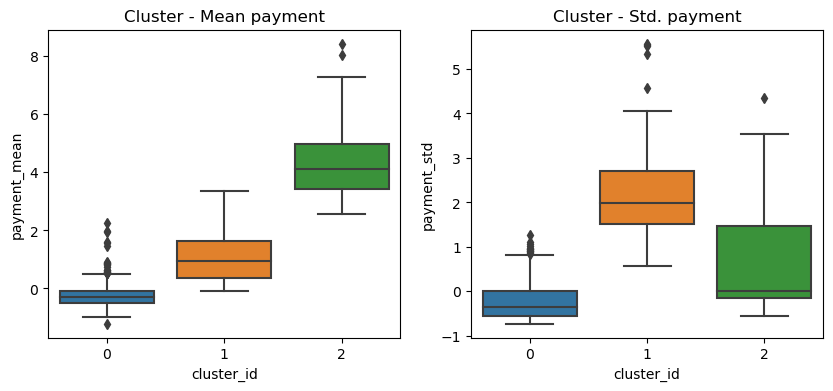

In [104]:
#plotting boxplot based on clusters
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(data=cust_segm,x="cluster_id",y="payment_mean")
plt.title("Cluster - Mean payment")
plt.subplot(1,2,2)
sns.boxplot(data=cust_segm,x="cluster_id",y="payment_std")
plt.title("Cluster - Std. payment")

In [105]:
#drop payment_mean and payment_std
cust_segm.drop(["payment_mean","payment_std"],axis=1,inplace=True)
cust_segm.head()

,CUSTOMER_NAME,cluster_id
0,3D D Corp,0
1,6TH Corp,0
2,A3 D Corp,0
3,ABC Corp,0
4,ABDU Corp,0


In [106]:
#creating a copy
cust_dupl=cust_segm.copy()
cust_dupl

,CUSTOMER_NAME,cluster_id
0,3D D Corp,0
1,6TH Corp,0
2,A3 D Corp,0
3,ABC Corp,0
4,ABDU Corp,0
...,...,...
685,YOUS Corp,0
686,ZAHR Corp,0
687,ZAIN Corp,0
688,ZERO Corp,0


In [107]:
#renaming the columns
cust_dupl.rename(columns={"CUSTOMER_NAME":"Customer_Name"},inplace=True)
cust_dupl.head()

,Customer_Name,cluster_id
0,3D D Corp,0
1,6TH Corp,0
2,A3 D Corp,0
3,ABC Corp,0
4,ABDU Corp,0


In [108]:
#setting the customer name as index
cust_dupl.set_index("Customer_Name")
cust_dupl.head()

,Customer_Name,cluster_id
0,3D D Corp,0
1,6TH Corp,0
2,A3 D Corp,0
3,ABC Corp,0
4,ABDU Corp,0


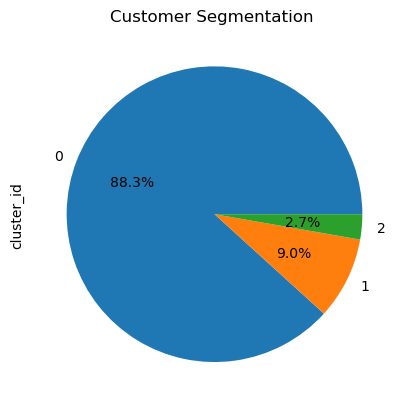

In [109]:
#visualisation
(round((cust_dupl["cluster_id"].value_counts(normalize=True))*100,2)).plot.pie(autopct='%1.1f%%')
plt.title("Customer Segmentation ")
plt.show(block=False)

In [110]:
#merging df and cust_segm
merged_df=pd.merge(df,cust_segm,how="inner",on="CUSTOMER_NAME")
merged_df.head()

,CUSTOMER_NAME,RECEIPT_DATE,USD Amount,INVOICE_CREATION_DATE,DUE_DATE,INVOICE_CURRENCY_CODE,INVOICE_TYPE,default,monthly_receipt,monthly_invoice_creation,...,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,others,CM,DM,INV,days_payable,cluster_id
0,C EA Corp,2021-04-20,101018.630400,2020-11-02,2020-12-30,AED,Non Goods,1,4,11,...,0,0,0,0,0,0,0,1,169,0
1,C EA Corp,2021-05-19,2859.090000,2021-04-07,2021-05-30,AED,Non Goods,0,5,4,...,0,0,0,0,0,0,0,1,42,0
2,C EA Corp,2021-02-20,10.578625,2020-11-26,2020-12-26,AED,Non Goods,1,2,11,...,0,0,0,0,0,0,0,1,86,0
3,RADW Corp,2021-01-31,48990.211330,2020-12-29,2021-01-28,SAR,Non Goods,1,1,12,...,0,0,0,0,0,0,0,1,33,0
4,RADW Corp,2021-01-31,41991.609710,2021-01-30,2021-03-01,SAR,Non Goods,0,1,1,...,0,0,0,0,0,0,0,1,1,0


In [111]:
#checking nulls in merged_df
merged_df["cluster_id"].isnull().sum()

0

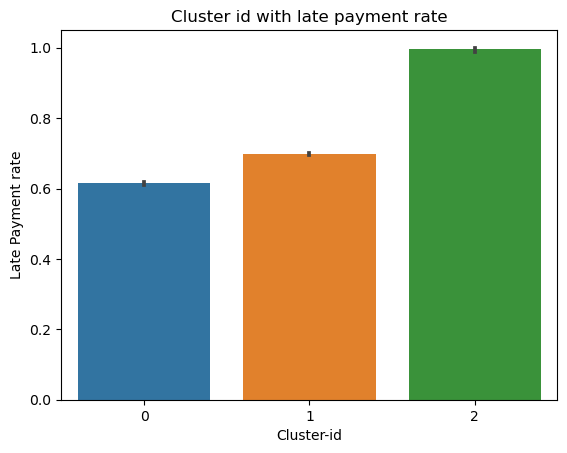

In [112]:
#Visualisation of cluster id with late payment rate
sns.barplot(data=merged_df,x="cluster_id",y="default",estimator=np.mean)
plt.title("Cluster id with late payment rate")
plt.xlabel("Cluster-id")
plt.ylabel("Late Payment rate")
plt.show(block=False)

## 7. Data preparation for Modeling

In [113]:
#columns in merged df
merged_df.columns

Index(['CUSTOMER_NAME', 'RECEIPT_DATE', 'USD Amount', 'INVOICE_CREATION_DATE',
       'DUE_DATE', 'INVOICE_CURRENCY_CODE', 'INVOICE_TYPE', 'default',
       'monthly_receipt', 'monthly_invoice_creation', 'monthly_due',
       '15 Days from EOM', '30 Days from EOM', '30 Days from Inv Date',
       '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
       '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date',
       'Immediate Payment', 'others', 'CM', 'DM', 'INV', 'days_payable',
       'cluster_id'],
      dtype='object')

In [114]:
#choose the important columns for modeling
regr_df=merged_df[['USD Amount','INVOICE_CREATION_DATE', '15 Days from EOM', '30 Days from EOM', 
                    '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM', 
                    '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date', 'Immediate Payment', 
                    'DM', 'INV', 'CM','cluster_id']]

In [115]:
#Extracting month from INVOICE_CREATION_DATE
regr_df["Invoice_Month"]=regr_df["INVOICE_CREATION_DATE"].dt.month
regr_df.drop("INVOICE_CREATION_DATE",axis=1,inplace=True)
regr_df.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
0,101018.630400,0,1,0,0,0,0,0,0,0,0,0,1,0,0,11
1,2859.090000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,4
2,10.578625,0,0,1,0,0,0,0,0,0,0,0,1,0,0,11
3,48990.211330,0,0,1,0,0,0,0,0,0,0,0,1,0,0,12
4,41991.609710,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [116]:
#columns in open invoice df
open_df.columns

Index(['Customer_Name', 'Due Date', 'AGE', 'USD Amount', 'INV_CREATION_DATE',
       '15 Days from EOM', '30 Days from EOM', '30 Days from Inv Date',
       '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
       '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date',
       'Immediate Payment', 'DM', 'INV', 'CM'],
      dtype='object')

In [117]:
#Choosing the important columns for open invoice dataframe
open_regr_df=open_df[['Due Date','USD Amount', 'INV_CREATION_DATE', '15 Days from EOM', '30 Days from EOM', 
                         '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
                         '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date', 'Immediate Payment', 
                         'DM', 'INV', 'CM','AGE']]
open_regr_df.head()

,Due Date,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE
1,2022-03-03,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0,0,1,0,33
2,2022-04-23,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0,-18
3,2022-01-19,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0,0,1,0,76
4,2022-04-30,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,-25
5,2022-04-30,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,-25


In [118]:
#extracting month from INV_CREATION_DATE
open_regr_df["Invoice_Month"]=open_regr_df["INV_CREATION_DATE"].dt.month
open_regr_df.drop("INV_CREATION_DATE",axis=1,inplace=True)
open_regr_df.head()

,Due Date,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE,Invoice_Month
1,2022-03-03,2000,0,0,1,0,0,0,0,0,0,0,0,1,0,33,2
2,2022-04-23,2000,0,0,1,0,0,0,0,0,0,0,0,1,0,-18,3
3,2022-01-19,2415,0,0,0,0,0,0,0,0,0,0,0,1,0,76,1
4,2022-04-30,3800,0,1,0,0,0,0,0,0,0,0,0,1,0,-25,3
5,2022-04-30,1264,0,1,0,0,0,0,0,0,0,0,0,1,0,-25,3


In [119]:
#Extracting month from Due Date
open_regr_df["Due_month"]=open_regr_df["Due Date"].dt.month
open_regr_df.drop("Due Date",axis=1,inplace=True)
open_regr_df.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE,Invoice_Month,Due_month
1,2000,0,0,1,0,0,0,0,0,0,0,0,1,0,33,2,3
2,2000,0,0,1,0,0,0,0,0,0,0,0,1,0,-18,3,4
3,2415,0,0,0,0,0,0,0,0,0,0,0,1,0,76,1,1
4,3800,0,1,0,0,0,0,0,0,0,0,0,1,0,-25,3,4
5,1264,0,1,0,0,0,0,0,0,0,0,0,1,0,-25,3,4


In [120]:
#checking the columns
regr_df.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM',
       'cluster_id', 'Invoice_Month'],
      dtype='object')

In [121]:
#checking the columns
open_regr_df.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM', 'AGE',
       'Invoice_Month', 'Due_month'],
      dtype='object')

### Splitting of train dataset and test dataset

In [122]:
#Train and test variables
X=regr_df.copy()
y=merged_df["default"]

In [123]:
#checking the values
X.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
0,101018.630400,0,1,0,0,0,0,0,0,0,0,0,1,0,0,11
1,2859.090000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,4
2,10.578625,0,0,1,0,0,0,0,0,0,0,0,1,0,0,11
3,48990.211330,0,0,1,0,0,0,0,0,0,0,0,1,0,0,12
4,41991.609710,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [124]:
#checking the values
y.head()

0    1
1    0
2    1
3    1
4    0
Name: default, dtype: int32

In [125]:
#splitting into train dataset and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(65755, 16)
(28182, 16)
(65755,)
(28182,)


In [126]:
#Feature scaling for USD amount
scaler=StandardScaler()
X_train["USD Amount"]=scaler.fit_transform(X_train[["USD Amount"]])
X_train.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
5808,-0.462487,1,0,0,0,0,0,0,0,0,0,0,1,0,1,5
4822,-0.462487,0,0,0,0,0,0,0,0,0,1,0,0,1,1,12
20528,0.413869,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1
78318,-0.504078,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
23754,-0.557396,0,0,0,0,0,1,0,0,0,0,0,1,0,1,3


In [127]:
#checking the statistical values of X_train
X_train.describe()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
count,6.575500e+04,65755.000000,65755.000000,65755.000000,65755.000000,65755.000000,65755.000000,65755.000000,65755.000000,65755.000000,65755.000000,65755.000000,65755.000000,65755.000000,65755.000000,65755.000000
mean,5.943252e-18,0.080967,0.121451,0.156581,0.040925,0.037868,0.133861,0.211269,0.040529,0.023846,0.112630,0.005794,0.939062,0.055144,0.531884,5.496495
std,1.000008e+00,0.272787,0.326653,0.363408,0.198117,0.190878,0.340505,0.408212,0.197198,0.152571,0.316143,0.075900,0.239219,0.228263,0.503628,4.080344
min,-5.620511e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,-5.221110e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000
50%,-3.665158e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,7.547576e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,10.000000
max,1.097380e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,12.000000


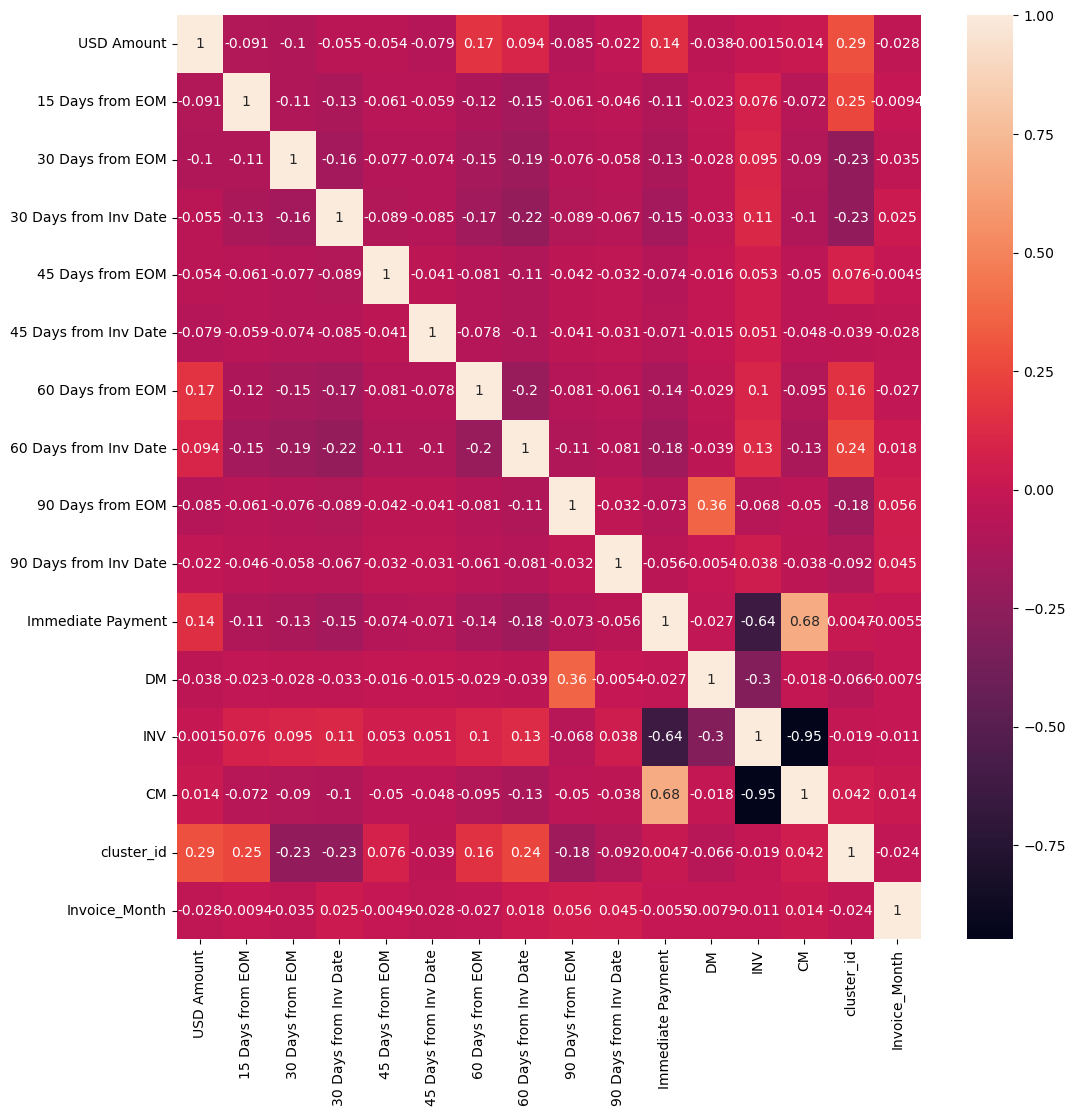

In [128]:
#plotting heatmap for X_train
plt.figure(figsize=(12,12))
sns.heatmap(X_train.corr(),annot=True)
plt.show(block=False)

In [129]:
#dropping
X_train.drop(['CM', 'INV', 'Immediate Payment'], axis=1, inplace=True)
X_test.drop(['CM', 'INV', 'Immediate Payment'], axis=1, inplace=True)

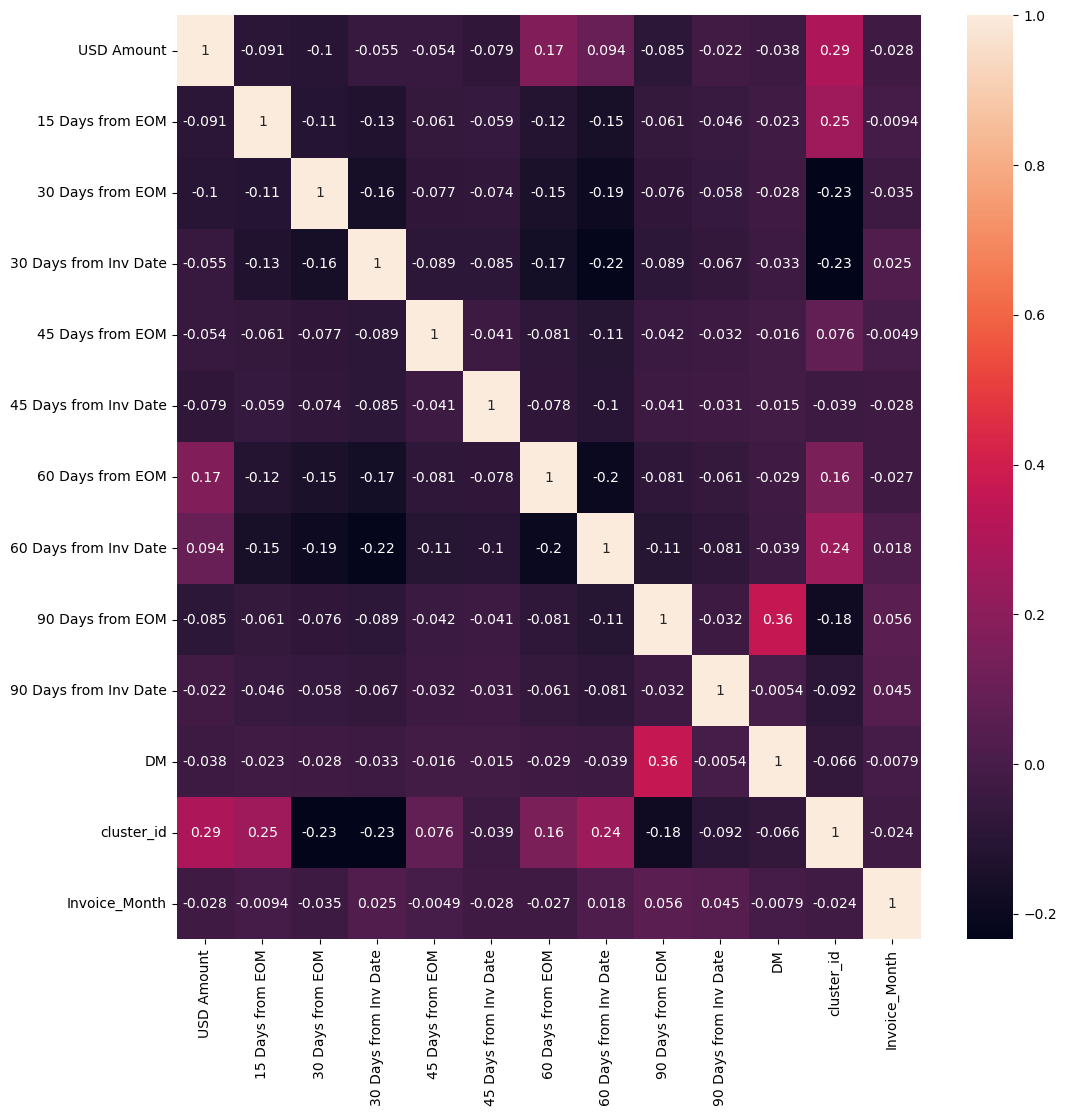

In [130]:
#plotting heatmap for X_train
plt.figure(figsize=(12,12))
sns.heatmap(X_train.corr(),annot=True)
plt.show(block=False)

## 8.Model Building

### Logistic regression

In [131]:
#Importing libraries
import statsmodels.api as sm
#import VIF from statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Model-1

In [132]:
#Adding aconstant variable
X_train_sm=sm.add_constant(X_train)
#Fitting the model
logm1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm1.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                default   No. Observations:                65755
Model:                            GLM   Df Residuals:                    65741
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30892.
Date:                Mon, 08 Jul 2024   Deviance:                       61783.
Time:                        18:38:22   Pearson chi2:                 6.36e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2915
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.8920      0.040     46.749      0.000       1.813       1.971
USD Amount               -0.0659      0.011     -5.854      0.000      -0.088      -0.044
15 Days from EOM          1.0648      0.101     10.505      0.000       0.866       1.263
30 Days from EOM         -3.7181      0.047    -79.216      0.000      -3.810      -3.626
30 Days from Inv Date    -1.1418      0.045    -25.119      0.000      -1.231      -1.053
45 Days from EOM         -1.0750      0.064    -16.669      0.000      -1.201      -0.949
45 Days from Inv Date    -1.7338      0.058    -29.737      0.000      -1.848      -1.619
60 Days from EOM         -3.6938      0.046    -80.172      0.000      -3.784      -3.604
60 Days from Inv Date    -1.7532      0.043    -40.586      0.000      -1.838      -1.669
90 Days from EOM         -2.0925      0.059    -35.528      0.000      -2.208      -1.977
90 Days from Inv Date    -2.4657      0.065    -38.176      0.000      -2.592      -2.339
DM                        1.7738      0.168     10.572      0.000       1.445       2.103
cluster_id                0.3570      0.024     14.923      0.000       0.310       0.404
Invoice_Month             0.0971      0.003     38.489      0.000       0.092       0.102
=========================================================================================
"""

### Checking VIF

In [133]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,cluster_id,2.74
12,Invoice_Month,2.31
7,60 Days from Inv Date,1.78
1,15 Days from EOM,1.46
6,60 Days from EOM,1.43
3,30 Days from Inv Date,1.27
8,90 Days from EOM,1.26
2,30 Days from EOM,1.18
0,USD Amount,1.17
10,DM,1.16


In [134]:
#Dropping of "current_occupation_Housewife"
X_train= X_train.drop(["15 Days from EOM"],axis=1)

In [135]:
#sanity check
X_train.columns

Index(['USD Amount', '30 Days from EOM', '30 Days from Inv Date',
       '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
       '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date',
       'DM', 'cluster_id', 'Invoice_Month'],
      dtype='object')

### Model-2

In [136]:
#Adding aconstant variable
X_train_sm2=sm.add_constant(X_train)
#Fitting the model
logm2=sm.GLM(y_train,X_train_sm2,family=sm.families.Binomial())
res1=logm2.fit()
res1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                default   No. Observations:                65755
Model:                            GLM   Df Residuals:                    65742
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30960.
Date:                Mon, 08 Jul 2024   Deviance:                       61920.
Time:                        18:38:23   Pearson chi2:                 6.35e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2900
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.0951      0.039     54.004      0.000       2.019       2.171
USD Amount               -0.0798      0.011     -7.064      0.000      -0.102      -0.058
30 Days from EOM         -3.9387      0.045    -87.944      0.000      -4.026      -3.851
30 Days from Inv Date    -1.3586      0.043    -31.297      0.000      -1.444      -1.273
45 Days from EOM         -1.3158      0.062    -21.119      0.000      -1.438      -1.194
45 Days from Inv Date    -1.9628      0.056    -34.850      0.000      -2.073      -1.852
60 Days from EOM         -3.9293      0.043    -90.944      0.000      -4.014      -3.845
60 Days from Inv Date    -1.9909      0.040    -49.793      0.000      -2.069      -1.913
90 Days from EOM         -2.3065      0.057    -40.156      0.000      -2.419      -2.194
90 Days from Inv Date    -2.6834      0.063    -42.491      0.000      -2.807      -2.560
DM                        1.7739      0.168     10.570      0.000       1.445       2.103
cluster_id                0.4055      0.024     17.143      0.000       0.359       0.452
Invoice_Month             0.0973      0.003     38.539      0.000       0.092       0.102
=========================================================================================
"""

In [137]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Invoice_Month,2.23
10,cluster_id,2.10
6,60 Days from Inv Date,1.56
5,60 Days from EOM,1.32
7,90 Days from EOM,1.25
2,30 Days from Inv Date,1.23
9,DM,1.16
1,30 Days from EOM,1.15
0,USD Amount,1.11
3,45 Days from EOM,1.10


In [138]:
#predicted values for train set
y_train_pred=res1.predict(X_train_sm2)
y_train_pred[:10]

5808     0.953645
4822     0.975989
20528    0.928569
78318    0.903142
23754    0.251174
66271    0.845919
43470    0.930140
5958     0.938895
92968    0.659823
60913    0.913001
dtype: float64

In [139]:
#reshaping the array
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.95364481, 0.97598896, 0.92856878, 0.90314244, 0.25117371,
       0.8459191 , 0.93014033, 0.93889497, 0.65982262, 0.91300123])

In [140]:
# Creating a dataframe for predicted values
y_pred=pd.DataFrame({"default":y_train.values, "default_pred":y_train_pred})
y_pred.head()

,default,default_pred
0,1,0.953645
1,1,0.975989
2,1,0.928569
3,1,0.903142
4,1,0.251174


#### creating a column "final_pred" if default_pred>0.5


In [141]:
# Threshold value of 0.5
y_pred["logreg_pred"]=y_pred["default_pred"].map(lambda x:1 if x>0.5 else 0)
y_pred.head()

,default,default_pred,logreg_pred
0,1,0.953645,1
1,1,0.975989,1
2,1,0.928569,1
3,1,0.903142,1
4,1,0.251174,0


### creating confusion matrix

In [142]:
#importing libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from statsmodels.tools.tools import add_constant

In [143]:
#confusion matrix
confusion=confusion_matrix(y_pred.default,y_pred.logreg_pred)
confusion

array([[12979,  9484],
       [ 4726, 38566]], dtype=int64)

In [144]:
# Accuracy
print(accuracy_score(y_pred.default, y_pred.logreg_pred))

0.7838947608546879


In [145]:
#other metrics
TP=confusion[1,1]#True positive
TN=confusion[0,0]#True negative
FP=confusion[0,1]#False positive
FN=confusion[1,0]#False negative

In [146]:
#Sensitivity
print("Sensitivity:",(TP / float(TP+FN)))
#Specificity
print("Specificity:",(TN / float(TN+FP)))
# Calculate false postive rate 
print("False positive Rate:",FP/float(TN+FP))
# positive predictive value
print("Positive Predictive Value:",TP/float(TP+FP))
# Negative predictive value
print("Negative Predctive Value:" ,TN/float(TN+FN))
# Precision
print("Precision",confusion[1,1]/(confusion[0,1]+confusion[1,1]))
# Recall
print("Recall",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Sensitivity: 0.8908343342880902
Specificity: 0.5777945955571384
False positive Rate: 0.4222054044428616
Positive Predictive Value: 0.8026222684703433
Negative Predctive Value: 0.7330697543066931
Precision 0.8026222684703433
Recall 0.8908343342880902


### Finding optimal cut-off point

In [147]:
# Trying out multiple threshold values
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    y_pred[f'y_pred_{i}'] = y_pred['default_pred'].apply(lambda x : 1 if x > i else 0)
y_pred

,default,default_pred,logreg_pred,y_pred_0.1,y_pred_0.2,y_pred_0.3,y_pred_0.4,y_pred_0.5,y_pred_0.6,y_pred_0.7,y_pred_0.8,y_pred_0.9
0,1,0.953645,1,1,1,1,1,1,1,1,1,1
1,1,0.975989,1,1,1,1,1,1,1,1,1,1
2,1,0.928569,1,1,1,1,1,1,1,1,1,1
3,1,0.903142,1,1,1,1,1,1,1,1,1,1
4,1,0.251174,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65750,1,0.975989,1,1,1,1,1,1,1,1,1,1
65751,1,0.697853,1,1,1,1,1,1,1,0,0,0
65752,0,0.925752,1,1,1,1,1,1,1,1,1,1
65753,0,0.180864,0,1,0,0,0,0,0,0,0,0


In [148]:
#creating columns with different probability cut-off's
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred[f'y_pred_{i}']=y_pred['default_pred'].map(lambda x:1 if x>i else 0)
y_pred

,default,default_pred,logreg_pred,y_pred_0.1,y_pred_0.2,y_pred_0.3,y_pred_0.4,y_pred_0.5,y_pred_0.6,y_pred_0.7,y_pred_0.8,y_pred_0.9,y_pred_0.0
0,1,0.953645,1,1,1,1,1,1,1,1,1,1,1
1,1,0.975989,1,1,1,1,1,1,1,1,1,1,1
2,1,0.928569,1,1,1,1,1,1,1,1,1,1,1
3,1,0.903142,1,1,1,1,1,1,1,1,1,1,1
4,1,0.251174,0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65750,1,0.975989,1,1,1,1,1,1,1,1,1,1,1
65751,1,0.697853,1,1,1,1,1,1,1,0,0,0,1
65752,0,0.925752,1,1,1,1,1,1,1,1,1,1,1
65753,0,0.180864,0,1,0,0,0,0,0,0,0,0,1


In [149]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_pred.default, y_pred[f'y_pred_{i}'])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.1   0.1  0.658383  1.000000  0.000000
0.2   0.2  0.706669  0.970572  0.198059
0.3   0.3  0.776625  0.947958  0.446423
0.4   0.4  0.774937  0.911623  0.511508
0.5   0.5  0.783895  0.890834  0.577795
0.6   0.6  0.780382  0.859235  0.628411
0.7   0.7  0.727808  0.708006  0.765971
0.8   0.8  0.668846  0.549155  0.899524
0.9   0.9  0.559775  0.353252  0.957797


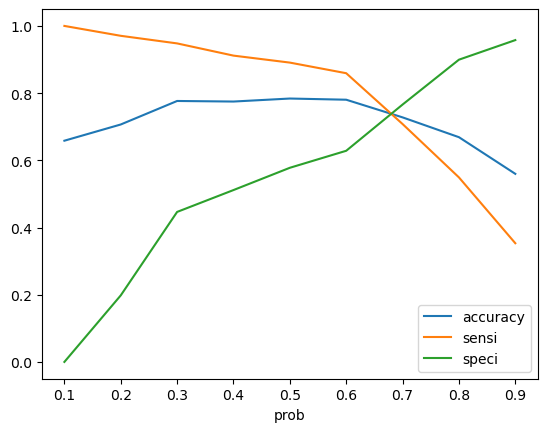

In [150]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show(block=False)

In [151]:
# For  0.68 cutoff for prediction
y_pred['final_predicted'] = y_pred.default_pred.map( lambda x: 1 if x > 0.68 else 0)

y_pred.head()

,default,default_pred,logreg_pred,y_pred_0.1,y_pred_0.2,y_pred_0.3,y_pred_0.4,y_pred_0.5,y_pred_0.6,y_pred_0.7,y_pred_0.8,y_pred_0.9,y_pred_0.0,final_predicted
0,1,0.953645,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.975989,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.928569,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.903142,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.251174,0,1,1,0,0,0,0,0,0,0,1,0


In [152]:
# Let's check the overall accuracy.
accuracy_score(y_pred.default, y_pred.final_predicted)

0.7490685119002357

In [153]:
#obtaining accuracy
print("Accuracy:", 100*(accuracy_score(y_pred.default,y_pred.final_predicted)))

Accuracy: 74.90685119002357


In [154]:
#confusion matrix
confusion2=confusion_matrix(y_pred.default,y_pred.final_predicted)
print(confusion2)

[[16323  6140]
 [10360 32932]]


In [155]:
#Checking other metrics
#True positive
TP=confusion2[1,1]
#True negative
TN=confusion2[0,0]
#False positive
FP=confusion2[0,1]
#False negative
FN=confusion2[1,0]

In [156]:
#Sensitivity
print("Sensitivity:",(TP / float(TP+FN)))
#Specificity
print("Specificity:",(TN / float(TN+FP)))
# Calculate false postive rate 
print("False positive Rate:",FP/float(TN+FP))
# positive predictive value
print("Positive Predictive Value:",TP/float(TP+FP))
# Negative predictive value
print("Negative Predctive Value:" ,TN/float(TN+FN))
# Precision
print("Precision",confusion2[1,1]/(confusion2[0,1]+confusion2[1,1]))
# Recall
print("Recall",confusion2[1,1]/(confusion2[1,0]+confusion2[1,1]))

Sensitivity: 0.76069481659429
Specificity: 0.7266616213328585
False positive Rate: 0.2733383786671415
Positive Predictive Value: 0.8428542178542179
Negative Predctive Value: 0.611737810591013
Precision 0.8428542178542179
Recall 0.76069481659429


In [157]:
#importing libraries
from sklearn.metrics import precision_score, recall_score

In [158]:
#Precision
print("Precision:", precision_score(y_pred.default, y_pred.final_predicted))

Precision: 0.8428542178542179


In [159]:
#Recall
print("Recall:", recall_score(y_pred.default, y_pred.final_predicted))

Recall: 0.76069481659429


In [160]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_pred.default, y_pred.default_pred)

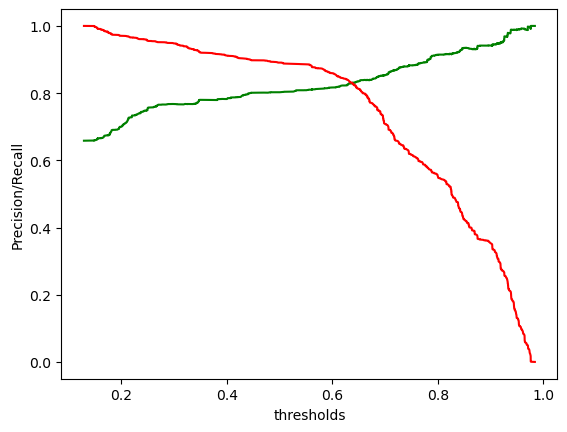

In [161]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")
plt.xlabel('thresholds')
plt.ylabel('Precision/Recall')
plt.show()

### plotting the ROC curve

In [162]:
#importing libraries
from sklearn.metrics import roc_auc_score,roc_curve

In [163]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [164]:
fpr, tpr, thresholds = roc_curve(y_pred.default,y_pred.default_pred,drop_intermediate = False)

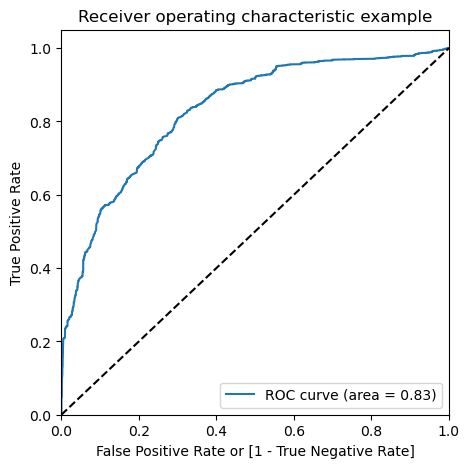

In [165]:
draw_roc(y_pred.default,y_pred.default_pred)

### Predictions on Test dataset

In [166]:
# Transforming the numerical column of test set
X_test[["USD Amount"]]=scaler.transform(X_test[["USD Amount"]])
X_test.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,DM,cluster_id,Invoice_Month
16556,-0.490069,0,1,0,0,0,0,0,0,0,0,1,4
64689,-0.341514,0,0,0,0,0,0,1,0,0,0,0,1
59541,-0.506096,0,0,0,0,0,0,0,0,0,0,1,4
84747,-0.547077,0,0,0,0,0,0,1,0,0,0,0,11
73797,0.305146,0,0,0,0,0,0,0,0,1,0,0,2


In [167]:
# Adding a constant value
X_test_sm=sm.add_constant(X_test)

In [168]:
#Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

16556    0.259488
64689    0.564226
59541    0.935267
84747    0.775985
73797    0.401380
61366    0.551677
89540    0.613364
90966    0.864660
33768    0.898492
19577    0.836591
dtype: float64

In [169]:
#Converting into single array
y_pred_1=pd.DataFrame(y_test_pred)

In [170]:
#y_test dataframe
y_test_df=pd.DataFrame(y_test)

In [171]:
#Adding column"CustID"
y_test_df["CustID"]=y_test_df.index

In [172]:
#sanity check
y_test_df.head()

,default,CustID
16556,1,16556
64689,1,64689
59541,1,59541
84747,1,84747
73797,1,73797


In [173]:
#resetting the index
y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [174]:
#concat both dataframe
y_pred_final=pd.concat([y_test_df,y_pred_1],axis=1)
y_pred_final.head()

,default,CustID,0
0,1,16556,0.259488
1,1,64689,0.564226
2,1,59541,0.935267
3,1,84747,0.775985
4,1,73797,0.401380


In [175]:
#renaming the columns
y_pred_final=y_pred_final.rename(columns={0:"Delay_prob","default":"Delay"})
y_pred_final.head()

,Delay,CustID,Delay_prob
0,1,16556,0.259488
1,1,64689,0.564226
2,1,59541,0.935267
3,1,84747,0.775985
4,1,73797,0.401380


In [176]:
# threshold with 0.64
y_pred_final["final_predicted"]=y_pred_final.Delay_prob.map(lambda x:1 if x>0.64 else 0)

In [177]:
# Accuracy.
print("Accuracy :",accuracy_score(y_pred_final.Delay, y_pred_final.final_predicted))
#precision score
print("precision",precision_score(y_pred_final.Delay, y_pred_final.final_predicted))
# Recall Score
print("recall score",recall_score(y_pred_final.Delay, y_pred_final.final_predicted))

Accuracy : 0.7700305159321553
precision 0.8267037849991969
recall score 0.8263940918334582


## 9. Model Building - RandomForest

In [178]:
#importing libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [179]:
# train set and test set
X=regr_df
y=merged_df["default"]

In [180]:
#splittiing into train set and test set
X_train_rf,X_test_rf,y_train_rf,y_test_rf=train_test_split(X,y,test_size=0.3,random_state=42)

In [181]:
#Building RandomForest model
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train_rf,y_train_rf)

RandomForestClassifier(random_state=42)

In [182]:
#predicted values for train set
y_train_pred_rf=rf.predict(X_train_rf)

In [183]:
#checking accuracy
accuracy=accuracy_score(y_train_rf,y_train_pred_rf)
print("Accuracy",accuracy)
print(classification_report(y_train_rf,y_train_pred_rf))

Accuracy 0.9583757889133906
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     22463
           1       0.95      0.99      0.97     43292

    accuracy                           0.96     65755
   macro avg       0.96      0.95      0.95     65755
weighted avg       0.96      0.96      0.96     65755



In [184]:
# Using cross validation to check if our model is overfitting

rf_cv = RandomForestClassifier(random_state=42)

# Compute cross-validation scores on the training data
scores = cross_val_score(rf_cv, X_train_rf, y_train_rf, cv=5, scoring= 'recall')

# Compute the mean and standard deviation of the cross-validation scores
mean_score = scores.mean()
std_score = scores.std()

# Print the mean and standard deviation of the cross-validation scores
print("Mean score:", mean_score)
print("Standard deviation:", std_score)

Mean score: 0.9550494065449604
Standard deviation: 0.0016395008713942995


In [185]:
#checking for overfit model by cross validation
rf_cv=RandomForestClassifier(random_state=42)
#cross validation on train data
scores=cross_val_score(rf_cv,X_train_rf,y_train_rf,cv=5,scoring="recall")
#mean and std score
score_mean=scores.mean()
print("mean score:",score_mean)
score_std=scores.std()
print("Std score:",score_std)


mean score: 0.9550494065449604
Std score: 0.0016395008713942995


In [186]:
#y predict for test data
y_test_pred_rf=rf.predict(X_test_rf)

In [187]:
#checking accuracy
accuracy=accuracy_score(y_test_rf,y_test_pred_rf)
print("Accuracy:",accuracy)
print(classification_report(y_test_rf,y_test_pred_rf))

Accuracy: 0.9241714569583422
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      9496
           1       0.93      0.96      0.94     18686

    accuracy                           0.92     28182
   macro avg       0.92      0.91      0.91     28182
weighted avg       0.92      0.92      0.92     28182



### Hyper-parameter tuning

In [188]:
#randomforest classifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [189]:
#hyper parameter tuning
hyper_params = {'max_depth': [10, 15, 20],
                'max_features': [2,4,6],
                'min_samples_leaf': [20, 50, 75],
                'n_estimators': [30, 60, 90]
               }

In [190]:
# Instantiating 4 fold GridSearch for given hyperparameters
model_cv = GridSearchCV(estimator=rf, 
             param_grid=hyper_params,
             verbose=1,
             cv=5,
             n_jobs=-1,
             return_train_score=True)

In [191]:
#fitting the values
model_cv.fit(X_train_rf, y_train_rf)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20], 'max_features': [2, 4, 6],
                         'min_samples_leaf': [20, 50, 75],
                         'n_estimators': [30, 60, 90]},
             return_train_score=True, verbose=1)

In [192]:
#getting best score
model_cv.best_score_

0.870321648543837

In [193]:
#getting best estimator
model_cv.best_estimator_

RandomForestClassifier(max_depth=20, max_features=6, min_samples_leaf=20,
                       n_estimators=90, n_jobs=-1, random_state=42)

In [194]:
rf_best=model_cv.best_estimator_

In [195]:
# predicting test data 
y_test_pred_cv = rf_best.predict(X_test_rf)

In [196]:
# Getting classification report
print ('\n clasification report:\n', classification_report(y_test_rf,y_test_pred_cv))
print ('\n confussion matrix:\n',confusion_matrix(y_test_rf, y_test_pred_cv))


 clasification report:
               precision    recall  f1-score   support

           0       0.87      0.73      0.80      9496
           1       0.87      0.95      0.91     18686

    accuracy                           0.87     28182
   macro avg       0.87      0.84      0.85     28182
weighted avg       0.87      0.87      0.87     28182


 confussion matrix:
 [[ 6931  2565]
 [ 1005 17681]]


### Fine tuning

In [197]:
# Fine tuning parameters
hyper_parameters = {'max_depth': [15, 20, 25],
                'max_features': [6,12],
                'min_samples_leaf': [5,10,20],
                'n_estimators': [50,60,70]
               }

In [198]:
# Instantiating 4 fold GridSearch for fine tuning of hyperparameters
model_cv2 = GridSearchCV(estimator=rf, 
             param_grid=hyper_parameters,
             verbose=1,
             cv=5,
             n_jobs=-1,
             return_train_score=True)

In [235]:
# Fitting different values on Train data
model_cv2.fit(X_train_rf, y_train_rf)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25], 'max_features': [6, 12],
                         'min_samples_leaf': [5, 10, 20],
                         'n_estimators': [50, 60, 70]},
             return_train_score=True, verbose=1)

In [200]:
#getting the best sccore
model_cv2.best_score_

0.9009809139989354

In [201]:
#getting fine tuning best parameters
model_cv2.best_estimator_

RandomForestClassifier(max_depth=25, max_features=12, min_samples_leaf=5,
                       n_estimators=50, n_jobs=-1, random_state=42)

### Finalizing the model

In [202]:
# Selecting best parameters of model_cv2
rf_best = model_cv2.best_estimator_

In [203]:
rf_best

RandomForestClassifier(max_depth=25, max_features=12, min_samples_leaf=5,
                       n_estimators=50, n_jobs=-1, random_state=42)

In [204]:
# Predicting Test data based on parameters obtained from fine tuning
y_test_pred_cv = rf_best.predict(X_test_rf)

In [205]:
# Checking the evaluation metrics 
print ('\n clasification report:\n', classification_report(y_test_rf,y_test_pred_cv))
print ('\n confussion matrix:\n',confusion_matrix(y_test_rf, y_test_pred_cv))


 clasification report:
               precision    recall  f1-score   support

           0       0.90      0.81      0.85      9496
           1       0.91      0.95      0.93     18686

    accuracy                           0.91     28182
   macro avg       0.90      0.88      0.89     28182
weighted avg       0.91      0.91      0.90     28182


 confussion matrix:
 [[ 7714  1782]
 [  884 17802]]


In [206]:
#Checking feature ranking
importance= rf_best.feature_importances_
sorted_idx = importance.argsort()[::-1]

# Print the feature ranking
print("Feature ranking:")
for i, idx in enumerate(sorted_idx):
    print(f"{i+1}. {X.columns[idx]} ({importance[idx]:.3f})")

Feature ranking:
1. USD Amount (0.357)
2. 60 Days from EOM (0.174)
3. 30 Days from EOM (0.155)
4. Invoice_Month (0.138)
5. cluster_id (0.067)
6. Immediate Payment (0.035)
7. 15 Days from EOM (0.024)
8. 60 Days from Inv Date (0.011)
9. 90 Days from Inv Date (0.010)
10. 30 Days from Inv Date (0.009)
11. 90 Days from EOM (0.008)
12. 45 Days from EOM (0.006)
13. 45 Days from Inv Date (0.004)
14. INV (0.001)
15. DM (0.001)
16. CM (0.000)


## 10. Adding open_Invoice dataset for prediction

In [207]:
# Selecting rows with negative age values 
open_regr_df_age = open_df[open_df['AGE'] < 0]
open_regr_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM
2,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0
4,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0
5,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0
6,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0
7,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0


In [208]:
#merging open_regr+df_age dataframe with cust_dupl
open_regr_df_age = pd.merge(open_regr_df_age, cust_dupl, how='left', on='Customer_Name')
open_regr_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0,0.0
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,0.0
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,0.0
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,0.0
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,0.0


In [209]:
# Checking the values of null percentage
round((open_regr_df_age.isnull().sum()/len(open_regr_df_age)*100),2).sort_values(ascending=False)

cluster_id               2.74
60 Days from EOM         0.00
CM                       0.00
INV                      0.00
DM                       0.00
Immediate Payment        0.00
90 Days from Inv Date    0.00
90 Days from EOM         0.00
60 Days from Inv Date    0.00
Customer_Name            0.00
Due Date                 0.00
45 Days from EOM         0.00
30 Days from Inv Date    0.00
30 Days from EOM         0.00
15 Days from EOM         0.00
INV_CREATION_DATE        0.00
USD Amount               0.00
AGE                      0.00
45 Days from Inv Date    0.00
dtype: float64

In [210]:
# Dropping the rows containing null values
open_regr_df_age.dropna(axis=0, inplace=True)

In [211]:
# Checking the values of null percentage
round((open_regr_df_age.isnull().sum()/len(open_regr_df_age)*100),2).sort_values(ascending=False)

Customer_Name            0.0
60 Days from EOM         0.0
CM                       0.0
INV                      0.0
DM                       0.0
Immediate Payment        0.0
90 Days from Inv Date    0.0
90 Days from EOM         0.0
60 Days from Inv Date    0.0
45 Days from Inv Date    0.0
Due Date                 0.0
45 Days from EOM         0.0
30 Days from Inv Date    0.0
30 Days from EOM         0.0
15 Days from EOM         0.0
INV_CREATION_DATE        0.0
USD Amount               0.0
AGE                      0.0
cluster_id               0.0
dtype: float64

In [212]:
#checking the shape
open_regr_df_age.shape

(27247, 19)

In [213]:
#checking the info value
open_regr_df_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 0 to 28014
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer_Name          27247 non-null  object        
 1   Due Date               27247 non-null  datetime64[ns]
 2   AGE                    27247 non-null  int64         
 3   USD Amount             27247 non-null  int32         
 4   INV_CREATION_DATE      27247 non-null  datetime64[ns]
 5   15 Days from EOM       27247 non-null  uint8         
 6   30 Days from EOM       27247 non-null  uint8         
 7   30 Days from Inv Date  27247 non-null  uint8         
 8   45 Days from EOM       27247 non-null  uint8         
 9   45 Days from Inv Date  27247 non-null  uint8         
 10  60 Days from EOM       27247 non-null  uint8         
 11  60 Days from Inv Date  27247 non-null  uint8         
 12  90 Days from EOM       27247 non-null  uint8         
 13  9

In [214]:
#convert cluster_id column into int
open_regr_df_age["cluster_id"]=open_regr_df_age["cluster_id"].astype(int)

In [215]:
#sanity check
open_regr_df_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 0 to 28014
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer_Name          27247 non-null  object        
 1   Due Date               27247 non-null  datetime64[ns]
 2   AGE                    27247 non-null  int64         
 3   USD Amount             27247 non-null  int32         
 4   INV_CREATION_DATE      27247 non-null  datetime64[ns]
 5   15 Days from EOM       27247 non-null  uint8         
 6   30 Days from EOM       27247 non-null  uint8         
 7   30 Days from Inv Date  27247 non-null  uint8         
 8   45 Days from EOM       27247 non-null  uint8         
 9   45 Days from Inv Date  27247 non-null  uint8         
 10  60 Days from EOM       27247 non-null  uint8         
 11  60 Days from Inv Date  27247 non-null  uint8         
 12  90 Days from EOM       27247 non-null  uint8         
 13  9

In [216]:
#dataframe for final prediction
open_regr_df_age_final=open_regr_df_age.copy()

In [217]:
# Dropping Customer_Name and AGE column
open_regr_df_age_final.drop(["Customer_Name","AGE"],axis=1,inplace=True)

In [218]:
# Extracting Month in INV_CREATION_DATE
open_regr_df_age_final["Invoice_Month"]=open_regr_df_age_final["INV_CREATION_DATE"].dt.month
# dropping due_date and invoice creation date
open_regr_df_age_final.drop(["Due Date","INV_CREATION_DATE"],axis=1,inplace=True)

In [219]:
#dropping unnessary columns
#open_regr_df_age_final.drop(["On Consignment","Cash on Delivery"],axis=1,inplace=True)

In [220]:
#Checking the columns
open_regr_df_age_final.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM',
       'cluster_id', 'Invoice_Month'],
      dtype='object')

## Final prediction based on RandomForest Model


In [221]:
# getting predictions on open invoices

y_open_inv= rf_best.predict_proba(open_regr_df_age_final)[:,1]

y_open_inv

array([0.92475391, 0.70252049, 0.40146966, ..., 0.74402891, 0.86209274,
       0.27885792])

In [222]:
# Adding the predicted values to the dataframe
open_regr_df_age["Pred_rf"]=y_open_inv
open_regr_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Pred_rf
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.924754
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.702520
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.401470
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.000000
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.833041


In [223]:
# Customer-wise model prediction
cust_seg_prob=pd.DataFrame(open_regr_df_age.groupby("Customer_Name").prod()["Pred_rf"].round(4))
cust_seg_prob

,Pred_rf
Customer_Name,
3D D Corp,0.0000
6TH Corp,0.2618
ABDU Corp,0.0000
ABEE Corp,0.1467
ABU Corp,0.0589
...,...
XPRE Corp,0.0000
YOUG Corp,0.5469
YOUS Corp,0.0001


In [224]:
# Threshold value of 0.64 
open_regr_df_age["Final_Prediction"]=open_regr_df_age.Pred_rf.map(lambda x:1 if x>0.64 else 0)

In [225]:
#checking dataframe 
open_regr_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,...,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Pred_rf,Final_Prediction
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0.924754,1
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0.702520,1
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0.401470,0
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0.000000,0
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0.833041,1


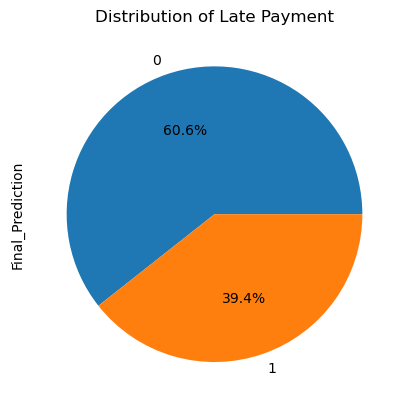

In [226]:
#visualising in pie chart
(open_regr_df_age["Final_Prediction"].value_counts(normalize=True)*100).plot.pie(autopct="%1.1f%%")
plt.title("Distribution of Late Payment")
plt.show(block=False)

### Prediction on customer name

In [227]:
# Checking Customers with our target variable_delayed
Delay_payment = open_regr_df_age.groupby(['Customer_Name'])['Final_Prediction'].sum()
Delay_payment = Delay_payment.to_frame()
Delay_payment = Delay_payment.sort_values(by ='Final_Prediction',ascending=False)

In [228]:
# Checking Customers for total invoice counts
Delay_payment_total = open_regr_df_age.groupby(['Customer_Name'])['Final_Prediction'].count() # total payments by each customers
Delay_payment_total = Delay_payment_total.to_frame()
Delay_payment_total = Delay_payment_total.sort_values(by ='Final_Prediction',ascending=False)

In [229]:
# Merging both dataframes based on Customer_name
Merge_df=pd.merge(Delay_payment,Delay_payment_total,how='inner',on='Customer_Name')

In [230]:
# Renaming the columns
Merge_df.columns=["Delayed_Payment","Total_Payments"]

In [231]:
# Creating a column for delay percentage of each customers
Merge_df['Delay%']=np.round(Merge_df['Delayed_Payment']/Merge_df['Total_Payments']*100,2)

In [232]:
# Checking Merge_df 
Merge_df.sort_values('Total_Payments',ascending=False)

,Delayed_Payment,Total_Payments,Delay%
Customer_Name,,,
SEPH Corp,3825,8260,46.31
FITR Corp,987,3454,28.58
PARF Corp,735,1717,42.81
AREE Corp,656,1117,58.73
ALLI Corp,138,1042,13.24
...,...,...,...
AL B Corp,0,1,0.00
SONO Corp,0,1,0.00
EXCE Corp,1,1,100.00


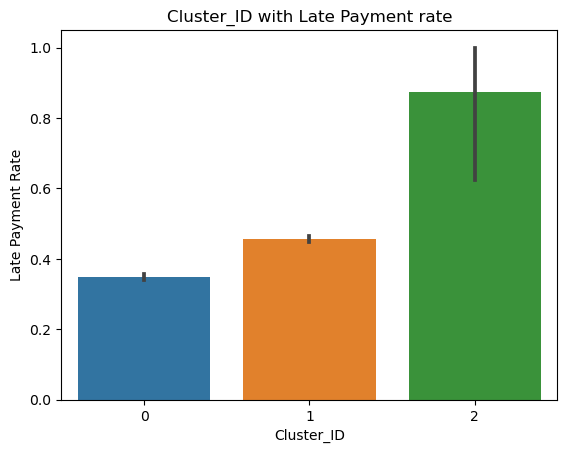

In [233]:
sns.barplot(data=open_regr_df_age, x='cluster_id', y='Final_Prediction', estimator=np.mean)
plt.title("Cluster_ID with Late Payment rate")
plt.xlabel("Cluster_ID")
plt.ylabel("Late Payment Rate")
plt.show()
#cluster ID 1 has significantly higher ratio of default than clusters 0 and 2

Cluster id 2 has higher late payment rate

In [234]:
# top 25 customers with highest delay rates
Merge_df.sort_values(['Delay%','Total_Payments','Delayed_Payment'],ascending=[False,False,False]).head(25) 

,Delayed_Payment,Total_Payments,Delay%
Customer_Name,,,
ALSU Corp,7,7,100.0
FEME Corp,5,5,100.0
SUND Corp,4,4,100.0
LVMH Corp,4,4,100.0
MAYC Corp,3,3,100.0
MUOS Corp,3,3,100.0
ZAIN Corp,3,3,100.0
VENI Corp,3,3,100.0
MILK Corp,3,3,100.0


## Results and Suggestions

## Results

#### A. Comparison of metrics in logistic regression and RandomForest model

#### B. Features that corresponds for delayed payments

### Recommendations:
    